<a href="https://colab.research.google.com/github/K-space-Kishan/Breast-Cancer-Wisconsin-Diagnostic-Data-Set-ML-Model/blob/main/Breast_Cancer_Wisconsin_(Diagnostic)_Data_Set_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wiscosin Breast Cancer Data Machine Learning Model**

## ***Project Description***

The dataset contains all reading of the female patients from Wiscosin a state in US who were diagnosed with Breast Cancer. The data set contains large volume of test results and readings. The diagnosis is further catagorieses based on nature of cancer, namely **Malignant** *(the presence of cancerous cells that have the ability to spread to other sites in the body (metastasize) or to invade nearby (locally) and destroy tissues. Malignant cells tend to have fast, uncontrolled growth)* and **Benign** *(Benign tumors are those that stay in their primary location without invading other sites of the body. They do not spread to local structures or to distant parts of the body. Benign tumors tend to grow slowly and have distinct borders.)*  

Conducting Exploratory Data Analysis on data of Breast Cancers in women. In EDA we manipulate data as per our need and find different patterns using ratios and relations between features which will help the ML model to diagnose Breast Cancer with its type.
This project aims to develop a machine learning model to assist in diagnosing breast cancer using clinical features. We start with Exploratory Data Analysis (EDA) to understand the patterns in the data, identify key feature relationships, and handle data quality issues such as outliers and missing values. The goal is to select meaningful features and reduce noise to improve model performance and ensure accurate diagnosis predictions. Key steps include outlier treatment using the Box-Cox transformation, feature engineering, and dimensionality reduction techniques such as PCA and UMAP.

### Importing all required libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pointbiserialr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import skew
from scipy.stats import zscore

from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import statsmodels.api as sm
from statsmodels.formula.api import ols

!pip install umap-learn
import shap
import umap
import shap
import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


### Extracting Data

In [3]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_data = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/Breast Cancer Wisconsin (Diagnostic) Data Set ML model./Breast Cancer Wisconsin Data/data.csv")

In [5]:
df_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df_data.sort_values('id', inplace=True)
df_data.reset_index(drop=True, inplace=False)

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0         8670         M        15.46         19.48          101.70   
1         8913         B        12.89         13.12           81.89   
2         8915         B        14.96         19.10           97.03   
3         9047         B        12.94         16.17           83.18   
4        85715         M        13.17         18.66           85.98   
..         ...       ...          ...           ...             ...   
564  911157302         M        21.10         20.52          138.10   
565  911296201         M        17.08         27.15          111.20   
566  911296202         M        27.42         26.27          186.90   
567  911320501         B        11.60         18.36           73.88   
568  911320502         B        13.17         18.22           84.28   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        748.9          0.10920           0.12230         0.14660   
1        515.9          0.06955           0.03729         0.02260   
2        687.3          0.08992           0.09823         0.05940   
3        507.6          0.09879           0.08836         0.03296   
4        534.6          0.11580           0.12310         0.12260   
..         ...              ...               ...             ...   
564     1384.0          0.09684           0.11750         0.15720   
565      930.9          0.09898           0.11100         0.10070   
566     2501.0          0.10840           0.19880         0.36350   
567      412.7          0.08508           0.05855         0.03367   
568      537.3          0.07466           0.05994         0.04859   

     concave points_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.08087  ...          26.00           124.90      1156.0   
1                0.01171  ...          15.54            87.40       577.0   
2                0.04819  ...          26.19           109.10       809.8   
3                0.02390  ...          23.02            89.69       580.9   
4                0.07340  ...          27.95           102.80       759.4   
..                   ...  ...            ...              ...         ...   
564              0.11550  ...          32.07           168.20      2022.0   
565              0.06431  ...          34.49           152.10      1648.0   
566              0.16890  ...          31.37           251.20      4254.0   
567              0.01777  ...          24.02            82.68       495.1   
568              0.02870  ...          23.89            95.10       687.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.15460             0.2394           0.3791   
1             0.09616             0.1147           0.1186   
2             0.13130             0.3030           0.1804   
3             0.11720             0.1958           0.1810   
4             0.17860             0.4166           0.5006   
..                ...                ...              ...   
564           0.13680             0.3101           0.4399   
565           0.16000             0.2444           0.2639   
566           0.13570             0.4256           0.6833   
567           0.13420             0.1808           0.1860   
568           0.12820             0.1965           0.1876   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                 0.15140          0.2837                  0.08019   
1                 0.05366          0.2309                  0.06915   
2                 0.14890          0.2962                  0.08472   
3                 0.08388          0.3297                  0.07834   
4                 0.20880          0.3900                  0.11790   
..                    ...             ...                      ...   
564               0.22800          0.2268                  0.07425   
565               0.15550          0.3010                  0.09060   
566               0.26250          0.2641 

In [8]:
Update_data= df_data.drop(['id','Unnamed: 32'], axis=1)
Update_data.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
131         M        15.46         19.48          101.70      748.9   
287         B        12.89         13.12           81.89      515.9   
291         B        14.96         19.10           97.03      687.3   
403         B        12.94         16.17           83.18      507.6   
47          M        13.17         18.66           85.98      534.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
131          0.10920           0.12230         0.14660              0.08087   
287          0.06955           0.03729         0.02260              0.01171   
291          0.08992           0.09823         0.05940              0.04819   
403          0.09879           0.08836         0.03296              0.02390   
47           0.11580           0.12310         0.12260              0.07340   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
131         0.1931  ...         19.26          26.00           124.90   
287         0.1337  ...         13.62          15.54            87.40   
291         0.1879  ...         16.25          26.19           109.10   
403         0.1735  ...         13.86          23.02            89.69   
47          0.2128  ...         15.67          27.95           102.80   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
131      1156.0           0.15460             0.2394           0.3791   
287       577.0           0.09616             0.1147           0.1186   
291       809.8           0.13130             0.3030           0.1804   
403       580.9           0.11720             0.1958           0.1810   
47        759.4           0.17860             0.4166           0.5006   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
131               0.15140          0.2837                  0.08019  
287               0.05366          0.2309                  0.06915  
291               0.14890          0.2962                  0.08472  
403               0.08388          0.3297                  0.07834  
47                0.20880          0.3900                  0.11790  

[5 rows x 31 columns]

In [9]:
Update_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
Update_data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

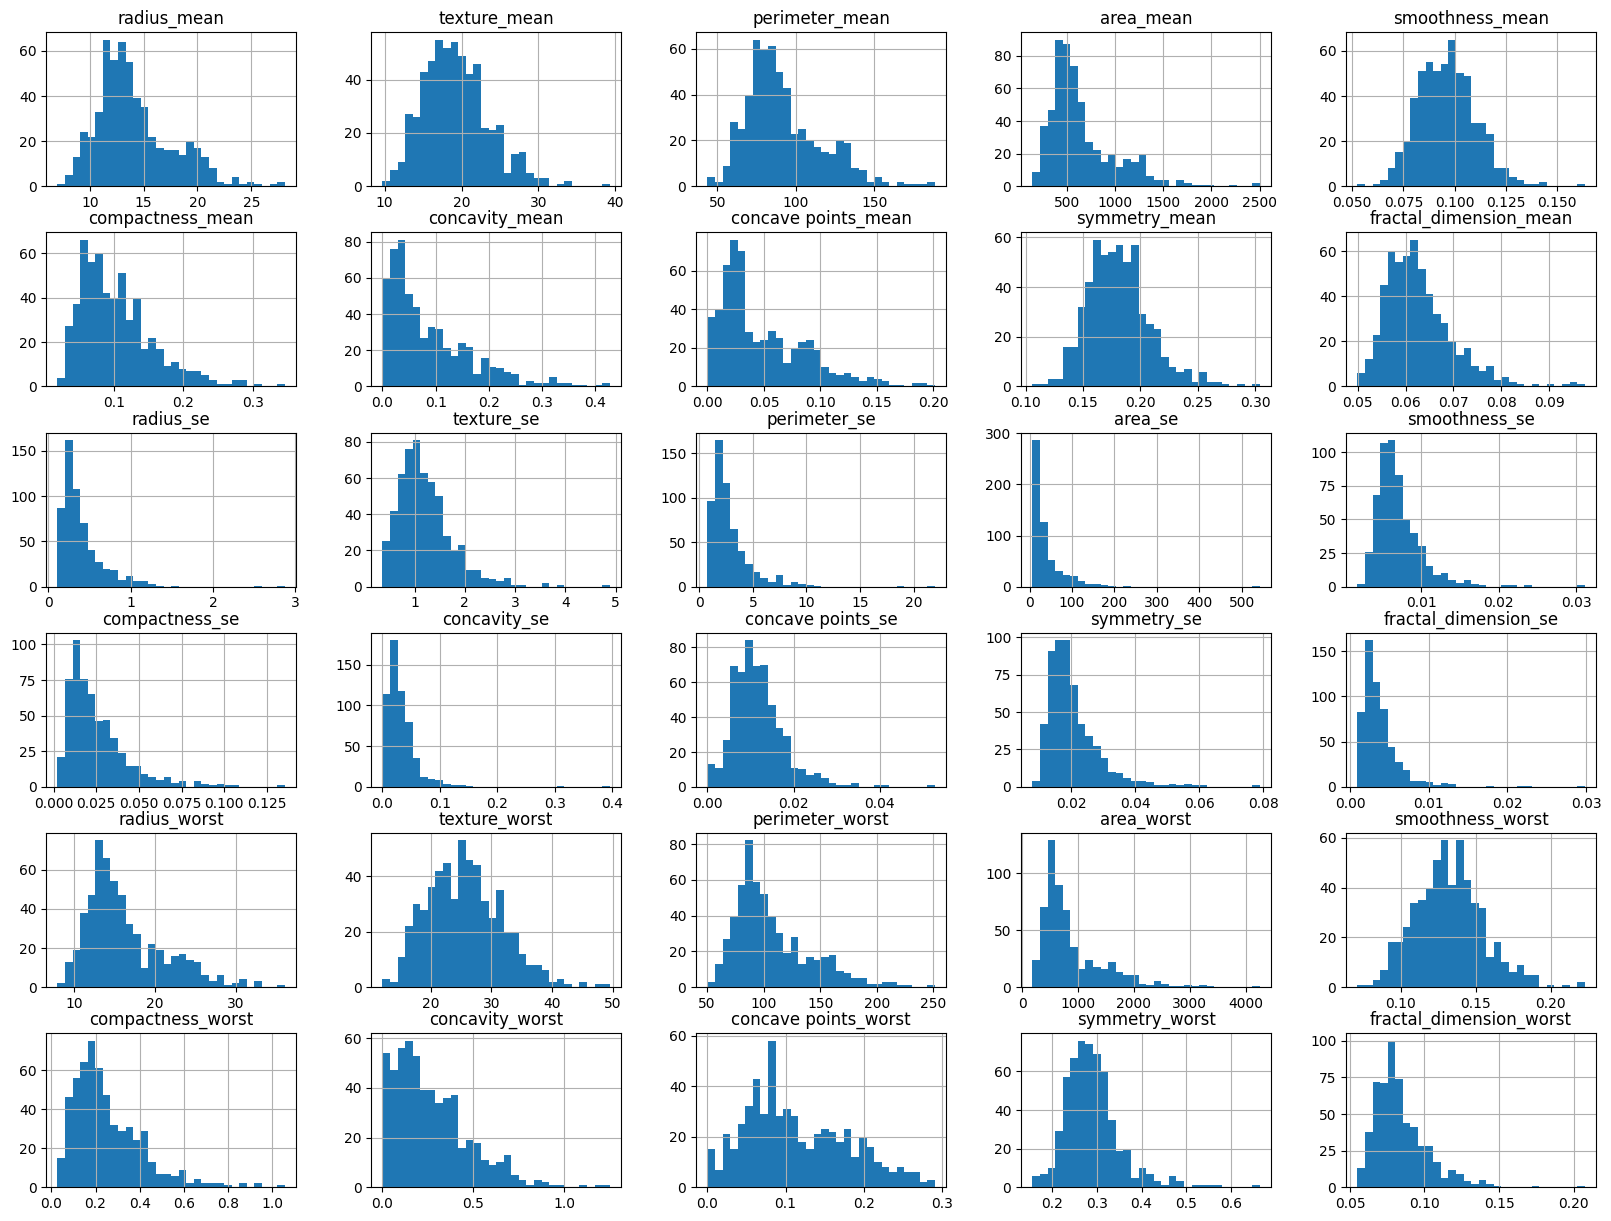

In [11]:
# Histograms
Update_data.hist(bins=30, figsize=(20, 15))
plt.show()

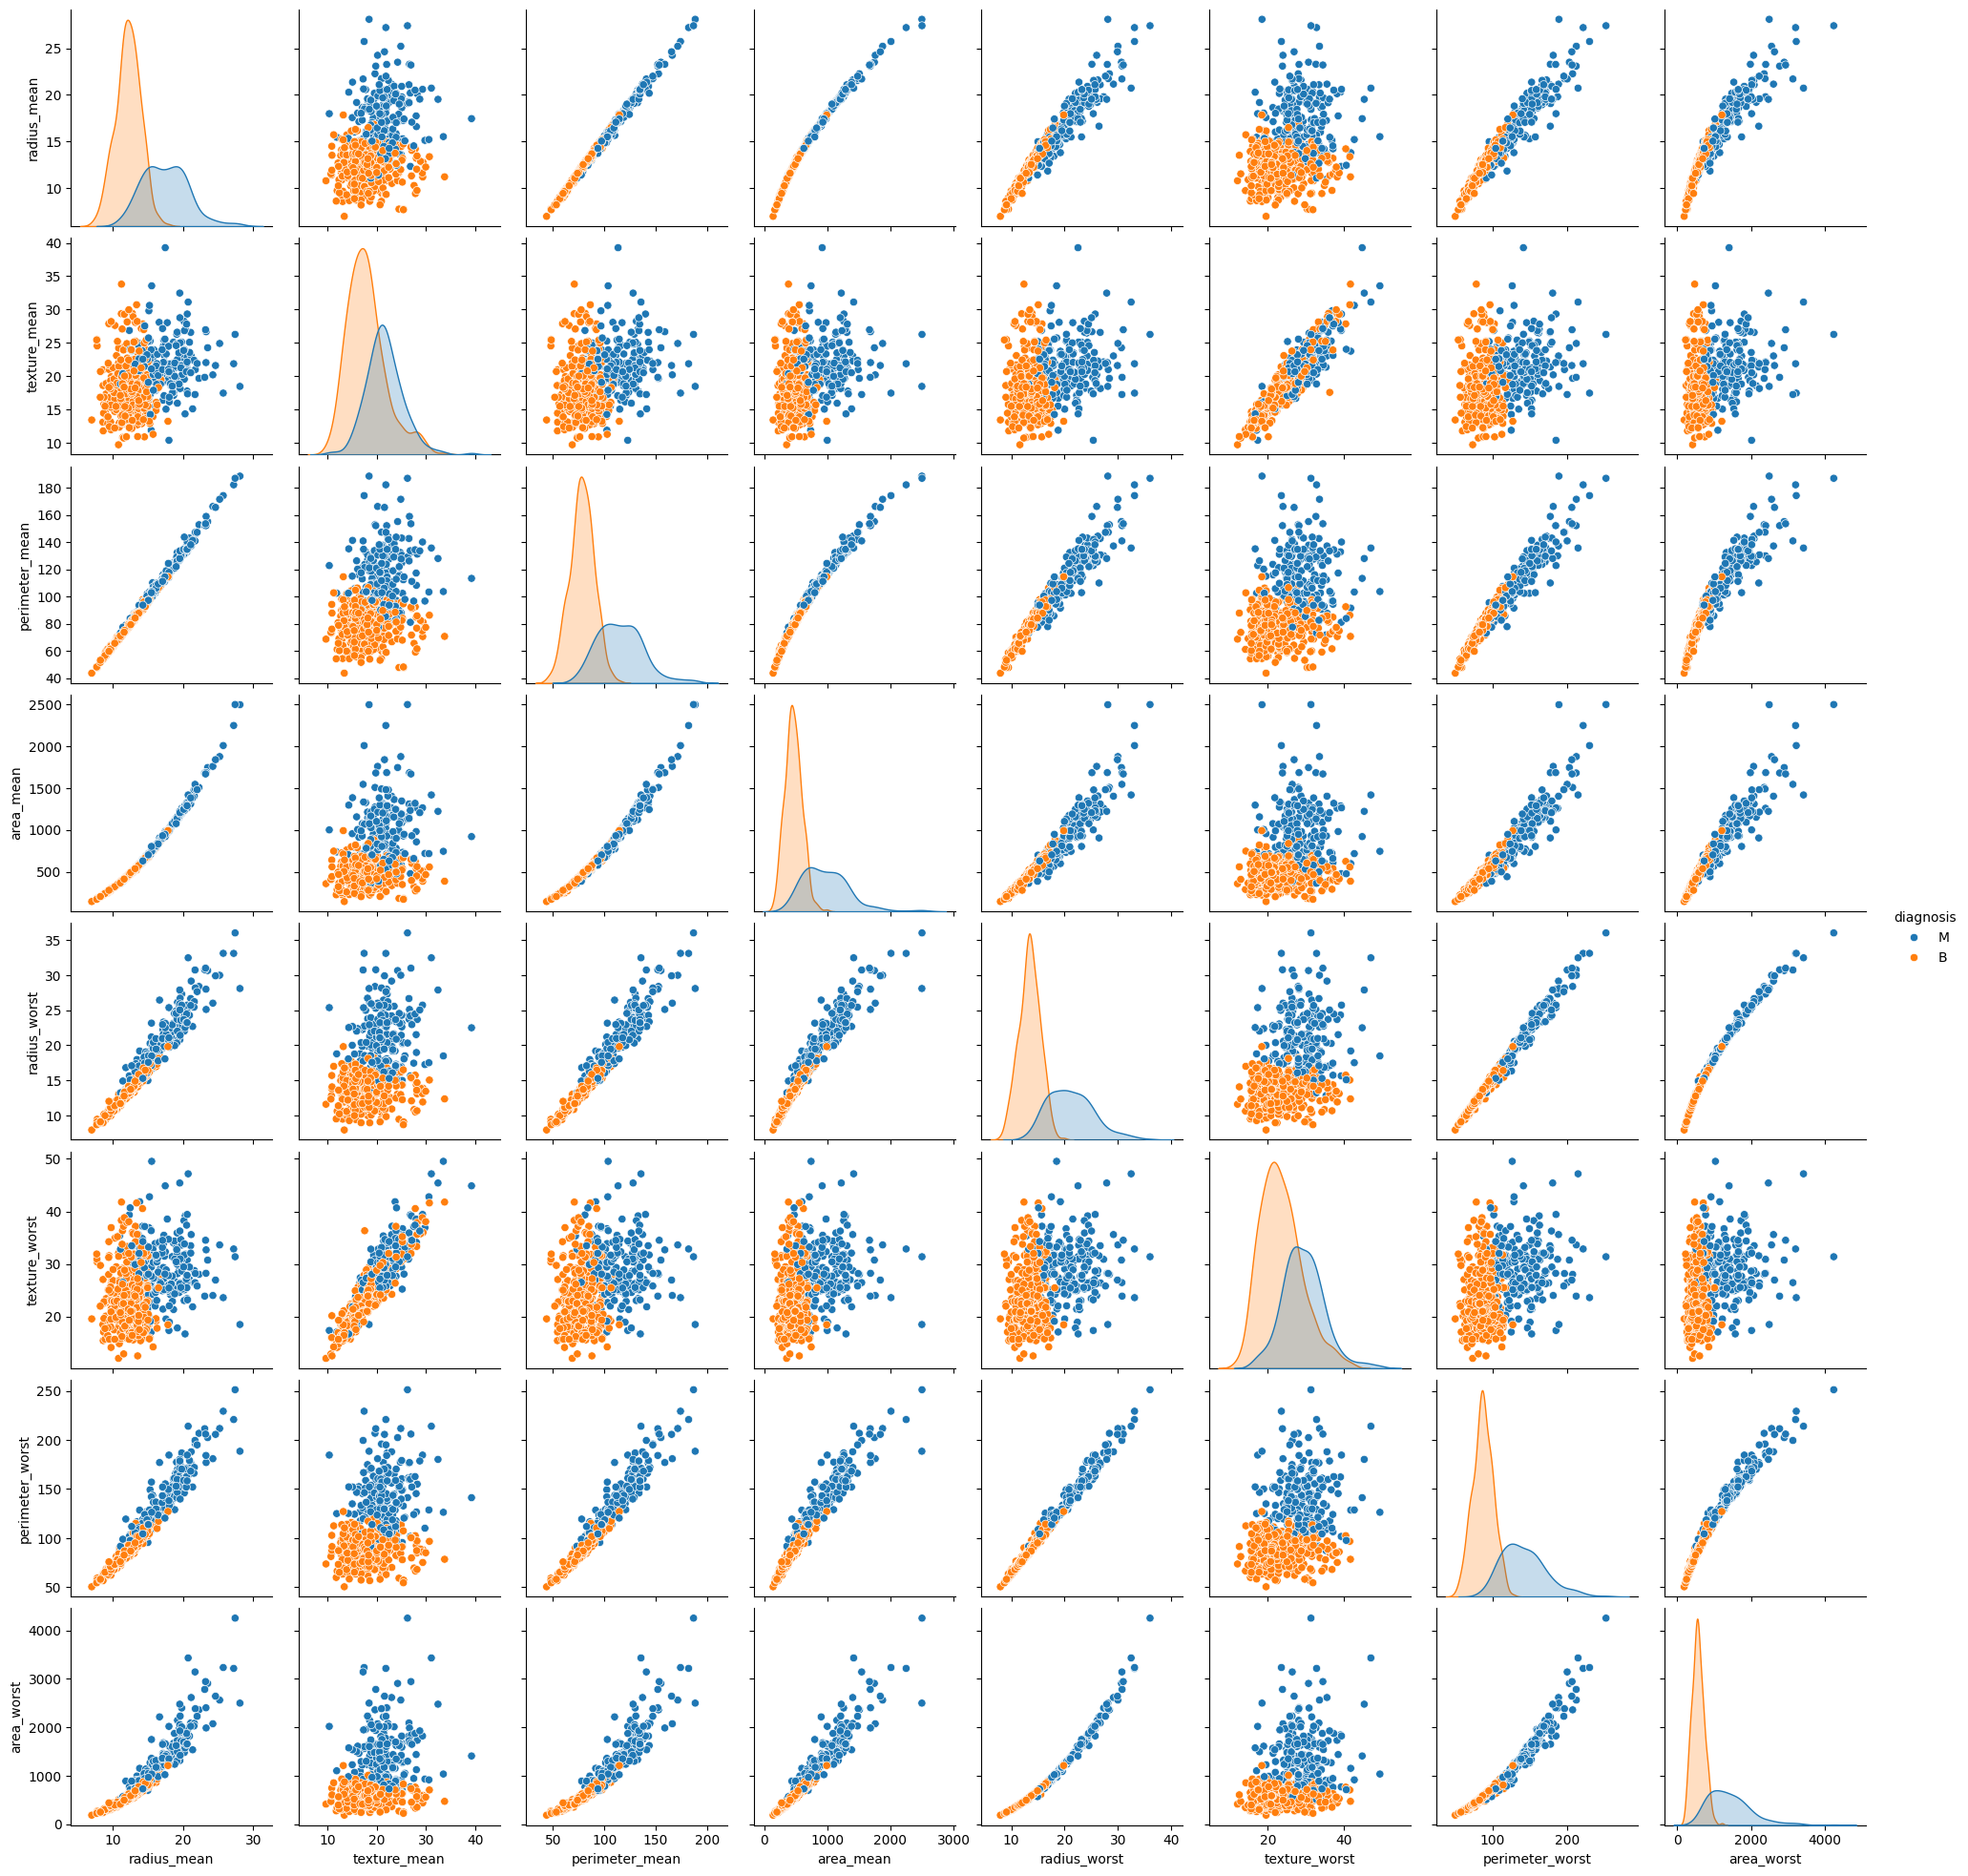

In [12]:
# Pair plot
sns.pairplot(Update_data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'])
plt.show()

**Observations:**

The above two plots shows the relation between different features wth eacch other. We can see a clear seperation between the Bengnin and Malignant data.

> Malignant cases are majorly in areas with higher values, and Bengnin in areas with lower values.

> For ease in evaluating the dataa we will convert the cases into binary.

In [13]:
Update_data['diagnosis_binary']= Update_data['diagnosis'].map({'M': 1,'B': 0})

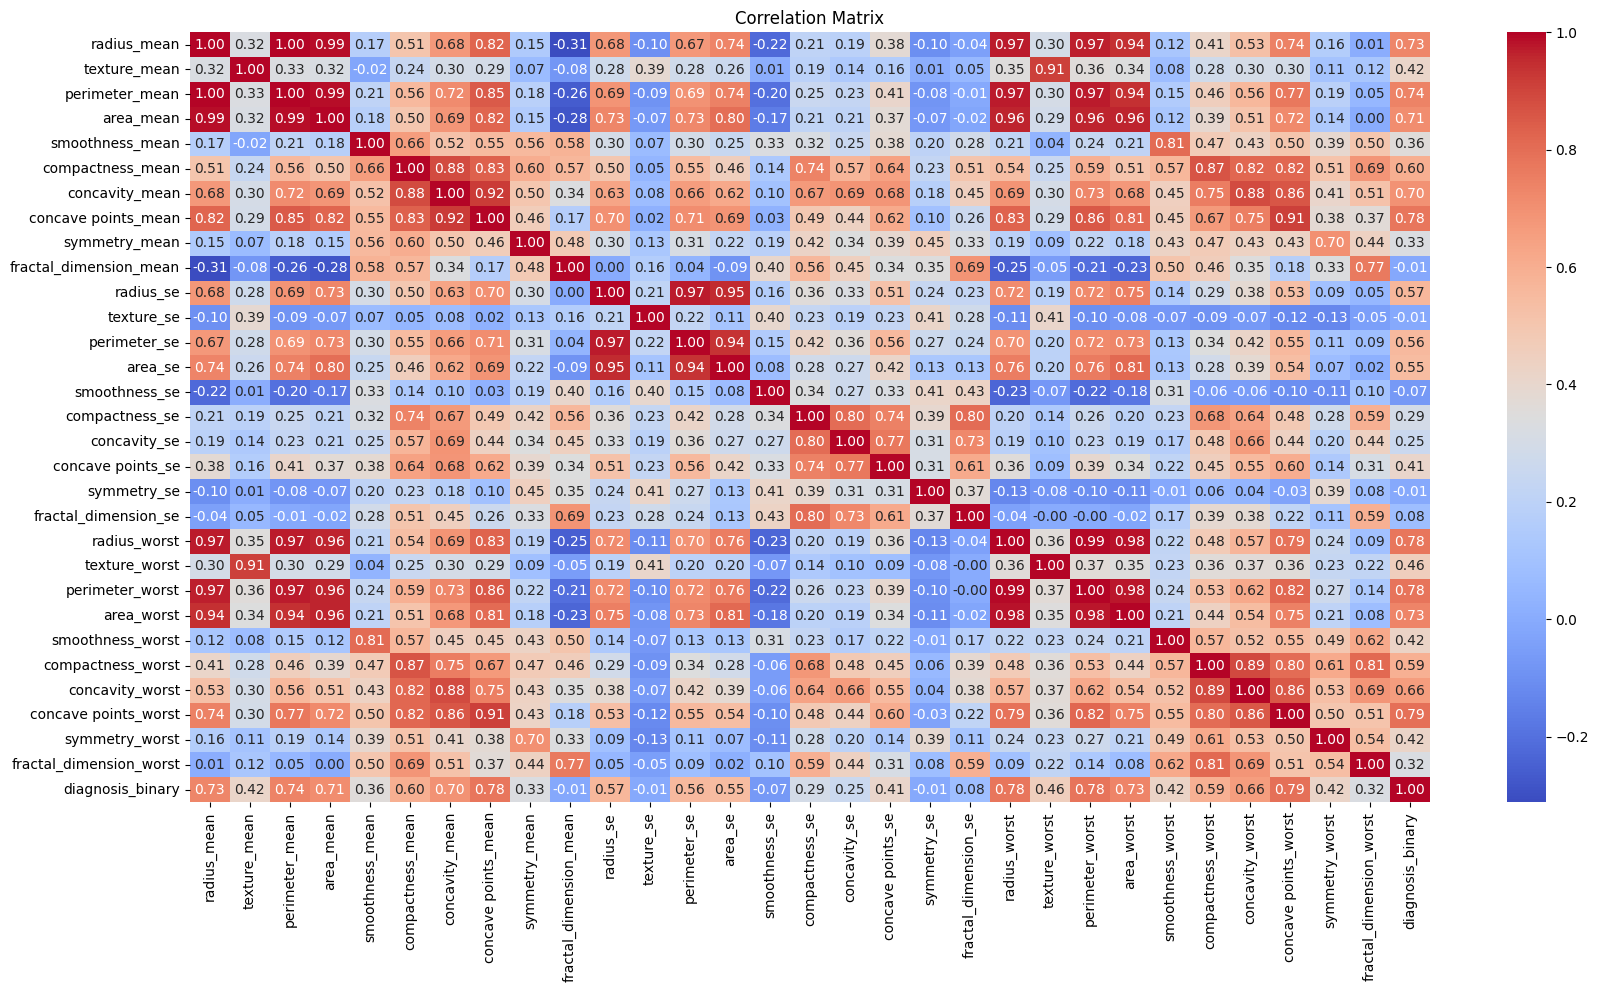

In [14]:
# Exclude non-numeric columns for correlation calculation
numeric_data = Update_data.select_dtypes(include=[float, int])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations:**

The heat map shows co-relation between all the features with each other.

* Concave point means has unusually big coorelation with 'area mean' and 'parameter mean'.

* These high co-relation van help us in finding indirect relation between them, and help in differentiate between Malignant and Bengnin.

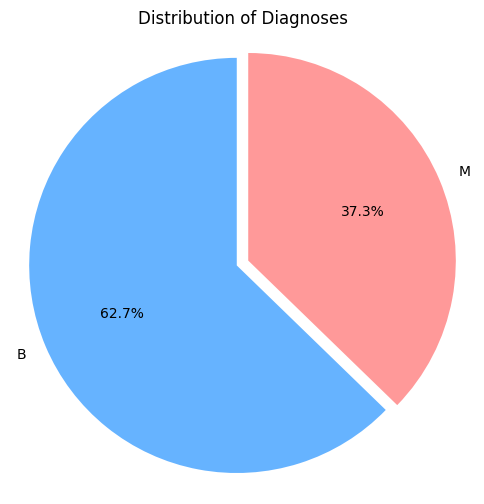

In [15]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(Update_data['diagnosis'].value_counts(), labels=Update_data['diagnosis'].value_counts().index, autopct='%1.1f%%',explode=[0, 0.06], startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Diagnoses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

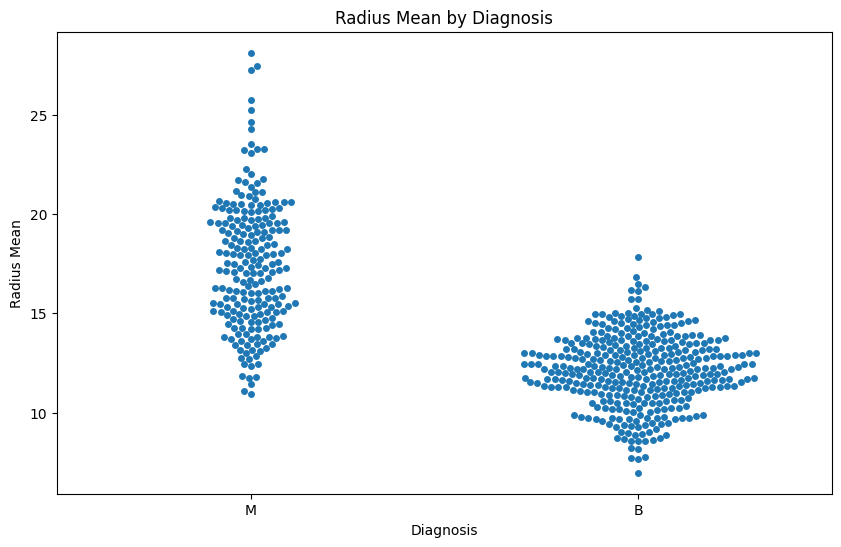

In [16]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='diagnosis', y='radius_mean', data=Update_data)
plt.title('Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

**Observations:**

From the above plot shows Radius Mean vs diagnosis. We can see that Malignant cases are on the higher values, whereas Bengnin cases are more widespread showing large no of variance in same mean radius.

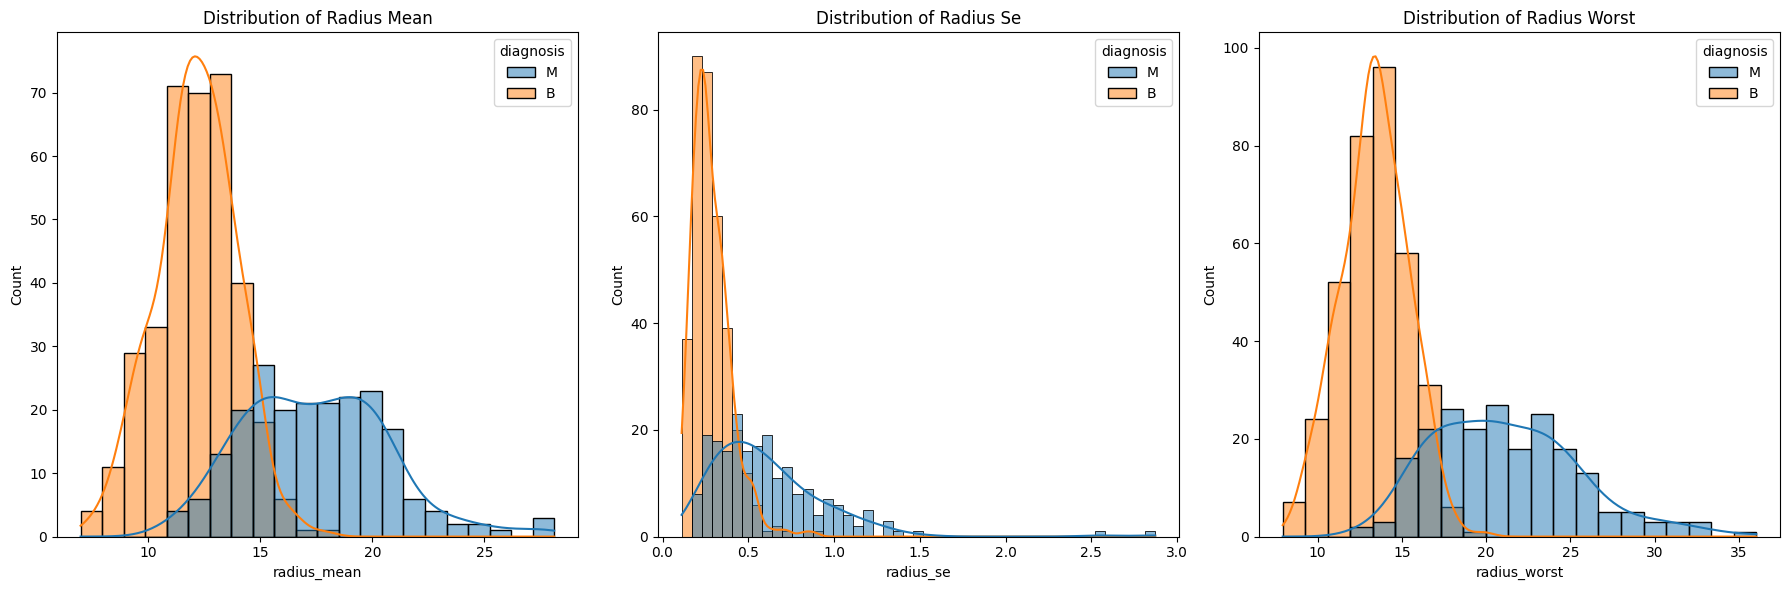

In [17]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Distribution of 'radius_worst' with KDE
sns.histplot(data= Update_data, x= 'radius_mean', hue='diagnosis', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Radius Mean')

# Second plot: Distribution of 'perimeter_worst' with KDE
sns.histplot(data= Update_data, x= 'radius_se', hue='diagnosis', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Radius Se')

# Third plot: Distribution of 'area_worst' with KDE
sns.histplot(data= Update_data, x= 'radius_worst', hue='diagnosis', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Radius Worst')

# Display all plots together
plt.tight_layout()
plt.show()

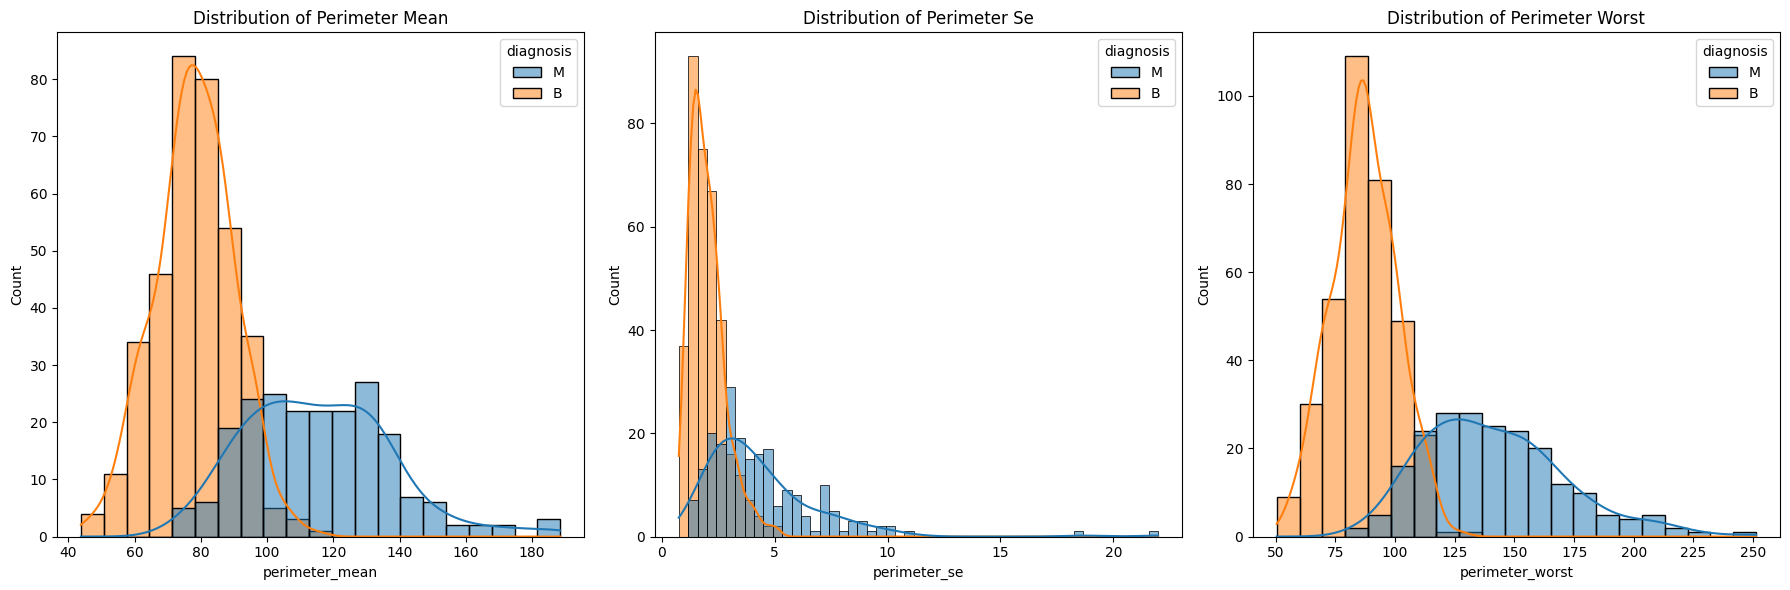

In [18]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Distribution of 'radius_worst' with KDE
sns.histplot(data= Update_data, x= 'perimeter_mean', hue='diagnosis', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Perimeter Mean')

# Second plot: Distribution of 'perimeter_worst' with KDE
sns.histplot(data= Update_data, x= 'perimeter_se', hue='diagnosis', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Perimeter Se')

# Third plot: Distribution of 'area_worst' with KDE
sns.histplot(data= Update_data, x= 'perimeter_worst', hue='diagnosis', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Perimeter Worst')

# Display all plots together
plt.tight_layout()
plt.show()

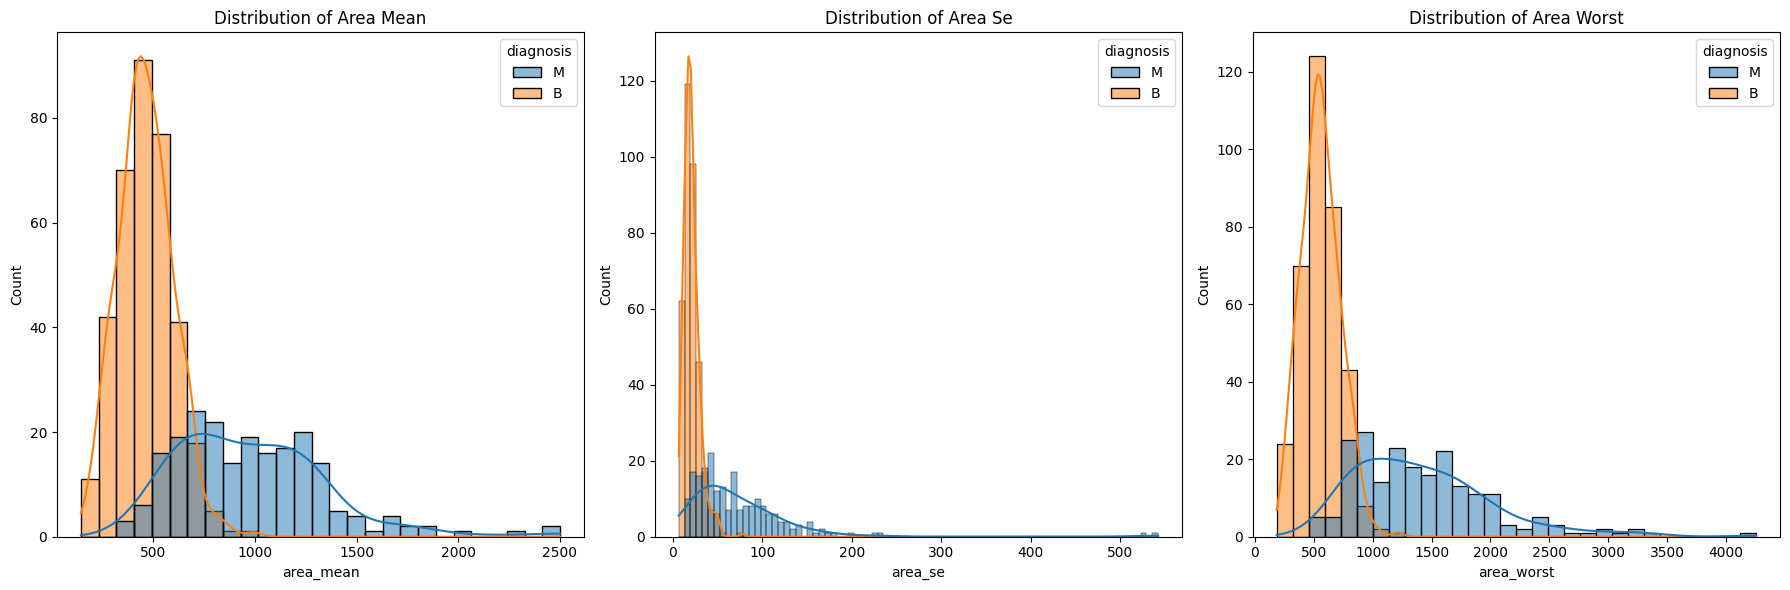

In [19]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Distribution of 'radius_worst' with KDE
sns.histplot(data= Update_data, x= 'area_mean', hue='diagnosis', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Area Mean')

# Second plot: Distribution of 'perimeter_worst' with KDE
sns.histplot(data= Update_data, x= 'area_se', hue='diagnosis', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Area Se')

# Third plot: Distribution of 'area_worst' with KDE
sns.histplot(data= Update_data, x= 'area_worst', hue='diagnosis', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Area Worst')

# Display all plots together
plt.tight_layout()
plt.show()

**Observations:**

The 3 group of plots shows Mean, SE, Worst of Radius, Perimeter, Area repsectively.

* In all the 3 groups we can see that Malignant cases have large range of reading.

* While Bengnin cases have large counts in small range of reading.

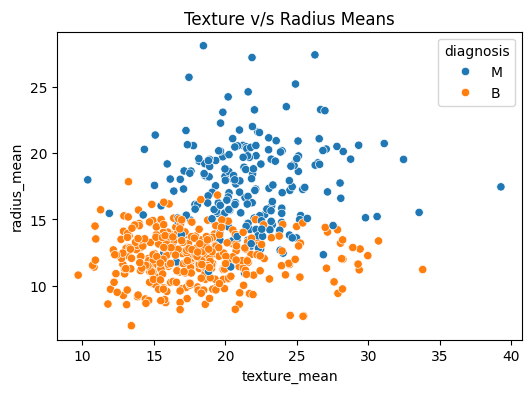

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(data= Update_data, x='texture_mean', y='radius_mean', hue= 'diagnosis')
plt.title('Texture v/s Radius Means')
plt.show()

As we saw in Heat map how some of the features were highly co-related to eacg other. Thus their ratios must give some indirect or hidden relations in data.

Here I will find the ratio of

* Area Worst to Perimeter Worst

* Area Worst to Arae Mean

* Radius Mean to Area Mean

* Radius Worst to Radius Mean

* Perimeter Mean to Radius Mean

* Perimeter Worst to Perimeter Mean

* Concave Point Mean to Concavity Mean

In [21]:
# Size Ratio
Update_data['Area Worst to Perimeter Worst Ratio']= Update_data['area_worst']/Update_data['perimeter_worst']
Update_data['Radius Mean to Area Mean Ratio']= Update_data['radius_mean']/Update_data['area_mean']
Update_data['Perimeter Mean to Radius Mean Ratio']= Update_data['perimeter_mean']/Update_data['radius_mean']

# Growth Ratio
Update_data['Area Worst to Area Mean Ratio']= Update_data['area_worst']/Update_data['area_mean']
Update_data['Perimeter Worst to Perimeter Mean Ratio']= Update_data['perimeter_worst']/Update_data['perimeter_mean']
Update_data['Radius Worst to Radius Mean Ratio']= Update_data['radius_worst']/Update_data['radius_mean']

# Shape Ratio
Update_data['Concave Points Mean to Concave Mean Ratio']= Update_data['concave points_mean']/Update_data['concavity_mean']

In [22]:
import numpy as np

# Select only the numeric columns
numeric_data = Update_data.select_dtypes(include=[np.number])

# Replace inf values with NaN in numeric columns
numeric_data_clean = numeric_data.replace([np.inf, -np.inf], np.nan)

# Fill NaN values with the mean of the respective columns
numeric_data_clean.fillna(numeric_data_clean.mean(), inplace=True)

# Now recombine with non-numeric data
non_numeric_data = Update_data.select_dtypes(exclude=[np.number])

# Combine cleaned numeric data and non-numeric data back into a single DataFrame
Update_data_clean = pd.concat([numeric_data_clean, non_numeric_data], axis=1)

In [23]:
import numpy as np
from scipy.stats import pointbiserialr
from pandas import DataFrame

# Select only numeric columns
numeric_data = Update_data.select_dtypes(include=[np.number])

# Replace inf values with NaN and then fill NaNs with column mean
numeric_data_clean = numeric_data.replace([np.inf, -np.inf], np.nan)
numeric_data_clean.fillna(numeric_data_clean.mean(), inplace=True)

# Check again for any remaining NaN values
print("NaN values in cleaned data:\n", numeric_data_clean.isnull().sum())

# Remove any rows that might still contain NaN (just in case)
numeric_data_clean = numeric_data_clean.dropna()

# Re-validate that no NaNs or Infs remain in the data
assert not numeric_data_clean.isnull().any().any(), "There are still NaN values in the dataset."
assert not np.isinf(numeric_data_clean).any().any(), "There are still Inf values in the dataset."

NaN values in cleaned data:
 radius_mean                                  0
texture_mean                                 0
perimeter_mean                               0
area_mean                                    0
smoothness_mean                              0
compactness_mean                             0
concavity_mean                               0
concave points_mean                          0
symmetry_mean                                0
fractal_dimension_mean                       0
radius_se                                    0
texture_se                                   0
perimeter_se                                 0
area_se                                      0
smoothness_se                                0
compactness_se                               0
concavity_se                                 0
concave points_se                            0
symmetry_se                                  0
fractal_dimension_se                         0
radius_worst                   

In [24]:
# Assuming 'diagnosis_binary' has been properly defined in Update_data
corr_with_diagnosis = {}

# Compute Point-Biserial Correlation for each numeric feature
for col in numeric_data_clean.columns:
    if col != 'diagnosis_binary':  # Exclude the target column
        corr, _ = pointbiserialr(numeric_data_clean[col], Update_data['diagnosis_binary'])
        corr_with_diagnosis[col] = corr

# Create DataFrame to display correlations
corr_with_diagnosis_df = DataFrame(list(corr_with_diagnosis.items()), columns=['Feature', 'Point-Biserial Correlation'])

# Display the correlation values
corr_with_diagnosis_df

Feature  Point-Biserial Correlation
0                                 radius_mean                    0.730029
1                                texture_mean                    0.415185
2                              perimeter_mean                    0.742636
3                                   area_mean                    0.708984
4                             smoothness_mean                    0.358560
5                            compactness_mean                    0.596534
6                              concavity_mean                    0.696360
7                         concave points_mean                    0.776614
8                               symmetry_mean                    0.330499
9                      fractal_dimension_mean                   -0.012838
10                                  radius_se                    0.567134
11                                 texture_se                   -0.008303
12                               perimeter_se                    0.556141
13                                    area_se                    0.548236
14                              smoothness_se                   -0.067016
15                             compactness_se                    0.292999
16                               concavity_se                    0.253730
17                          concave points_se                    0.408042
18                                symmetry_se                   -0.006522
19                       fractal_dimension_se                    0.077972
20                               radius_worst                    0.776454
21                              texture_worst                    0.456903
22                            perimeter_worst                    0.782914
23                                 area_worst                    0.733825
24                           smoothness_worst                    0.421465
25                          compactness_worst                    0.590998
26                            concavity_worst                    0.659610
27                       concave points_worst                    0.793566
28                             symmetry_worst                    0.416294
29                    fractal_dimension_worst                    0.323872
30        Area Worst to Perimeter Worst Ratio                    0.754791
31             Radius Mean to Area Mean Ratio                   -0.694006
32        Perimeter Mean to Radius Mean Ratio                    0.654453
33              Area Worst to Area Mean Ratio                    0.620746
34    Perimeter Worst to Perimeter Mean Ratio                    0.625706
35          Radius Worst to Radius Mean Ratio                    0.641084
36  Concave Points Mean to Concave Mean Ratio                   -0.206570

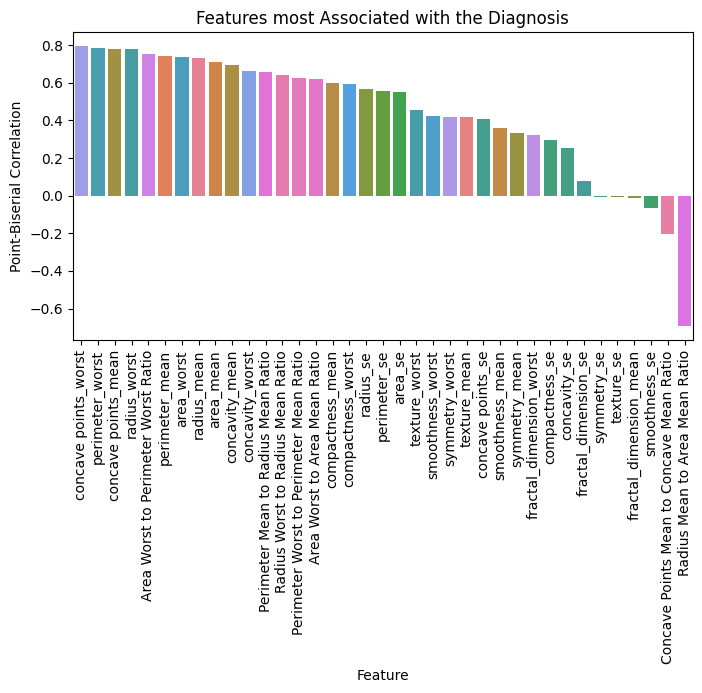

In [86]:
plt.figure(figsize=(8,4))
sns.barplot(data=corr_with_diagnosis_df, x='Feature', y='Point-Biserial Correlation', order=corr_with_diagnosis_df.sort_values(by='Point-Biserial Correlation',ascending=False)['Feature'], hue='Feature')
plt.xticks(rotation= 90)
plt.title('Features most Associated with the Diagnosis')
plt.show()

**Observations:**

The above illustration shows the features which would diagnose Breast Cancer.

* Concave Point Worst associates with most Diagnosis while Radius Mean to Area Mean ratio associates the least with diagnosis.

* This understanding can be used for Unsupervised ML model.

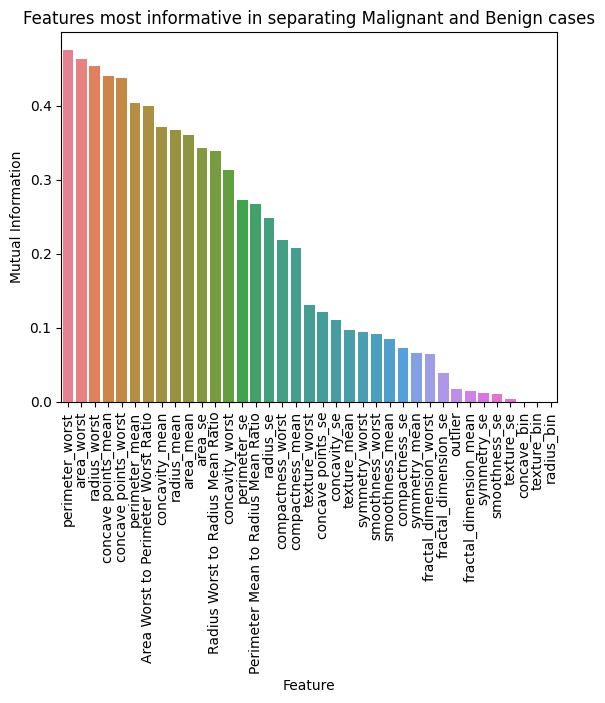

In [82]:
from sklearn.feature_selection import mutual_info_classif

# Drop 'id' and any other non-numeric columns
X = Update_data.drop(['diagnosis', 'diagnosis_binary'], axis=1)

# Check if all columns in X are numeric
X_numeric = X.apply(pd.to_numeric, errors='coerce')
X_numeric = X_numeric.fillna(0)
y = Update_data['diagnosis_binary']

# Compute mutual information
mi = mutual_info_classif(X_numeric, y)

# Create DataFrame for mutual information
mi_df = pd.DataFrame({'Feature': X_numeric.columns, 'Mutual Information': mi}).sort_values(by='Mutual Information', ascending=False)

# Plot the result
sns.barplot(x='Feature', y='Mutual Information', data=mi_df, hue='Feature')
plt.xticks(rotation=90)
plt.title('Features most informative in separating Malignant and Benign cases')
plt.show()

**Observations:**

The above illustration show features which efficiently differentiate b/s Malignanat and Bengnin cases.

* Perimeter Worst and Area Worst tends to best in differentiating whereas Texture se does not help in diffrentiating at all.

* This information will be used in this project for Supervised ML Model.

Droping less important columns

In [27]:
Update_data.drop(['Radius Mean to Area Mean Ratio','Area Worst to Area Mean Ratio','Perimeter Worst to Perimeter Mean Ratio','Concave Points Mean to Concave Mean Ratio'], axis=1, inplace=True)

## ***HYPOTHESIS TESTING***

### Hypothesis Testing 1:

---
Texture can distinguish type of Cancer Malignent or Beningn

#### Stating Research Hypothesis:

* Null Hypothesis: There is no relation between Texture and the distingushed type of Cancer. (H1: 𝛽1 = 0)
* Alternate Hypothesis: There is a relation between Texture and type of cancer, it can distingush between Malignant and Beningn. (H2: 𝛽1 < 0.05)

*Test: T-Test (Independent Samples t-test)*

In [28]:
from scipy.stats import ttest_ind

# Split the data into two groups based on diagnosis
malignant = Update_data[Update_data['diagnosis'] == 'M']['texture_mean']
benign = Update_data[Update_data['diagnosis'] == 'B']['texture_mean']

# Perform t-test
t_stat, p_value = ttest_ind(malignant, benign)

if p_value<0.05:
    print(f"P Value is {p_value}, Thus Null Hypothesis Failed, therefore there is a relation between Texture and type of cancer, it can distingush between Malignant and Beningn.")
else:
    print(f"P Value is {p_value}, Thus Alternate Hypothesis Failed, therefore there is no relation between Texture and the distingushed type of Cancer")

P Value is 4.058636047898074e-25, Thus Null Hypothesis Failed, therefore there is a relation between Texture and type of cancer, it can distingush between Malignant and Beningn.


### Hypothesis Testing 2:
---

Does Radius Worst vary across Concave Point Mean

* Null Hypothesis: There is no significant variation in Mean Radius as we move across different level of Concave Point Mean. (H0:𝛽1 = 0 )
* Alternate Hypothesis: There is a significant variation in Mean Radius across different level of Concave Point Mean. (H1:𝛽1>0.05)

*Test: Anova Test*

In [29]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Divide 'concave points mean' into three groups (low, medium, high)
Update_data['concave_bin'] = pd.qcut(Update_data['concave points_mean'], q=3, labels=['Low', 'Medium', 'High'])

# Group 'radius worst' by 'concave_bin'
low_group = Update_data[Update_data['concave_bin'] == 'Low']['radius_worst']
medium_group = Update_data[Update_data['concave_bin'] == 'Medium']['radius_worst']
high_group = Update_data[Update_data['concave_bin'] == 'High']['radius_worst']

# Perform ANOVA test to compare the means of 'radius worst' across 'concave points mean' groups
f_stat, p_value = f_oneway(low_group, medium_group, high_group)

# Display the results
if p_value<0.05:
    print(f"The ANOVA F-statistic: {f_stat}and P-value: {p_value}, Thus Null Hypothesis is rejected, therefore there is a significant change in Mean Radius across different level of Concave Point Mean.")
else:
    print(f"The ANOVA F-statistic: {f_stat}and P-value: {p_value}, Thus Alternate Hypothesis is rejected, therefore there is a significant variation in Mean Radius across different level of Concave Point Mean.")

The ANOVA F-statistic: 372.0580300648714and P-value: 7.053180137055137e-104, Thus Null Hypothesis is rejected, therefore there is a significant change in Mean Radius across different level of Concave Point Mean.


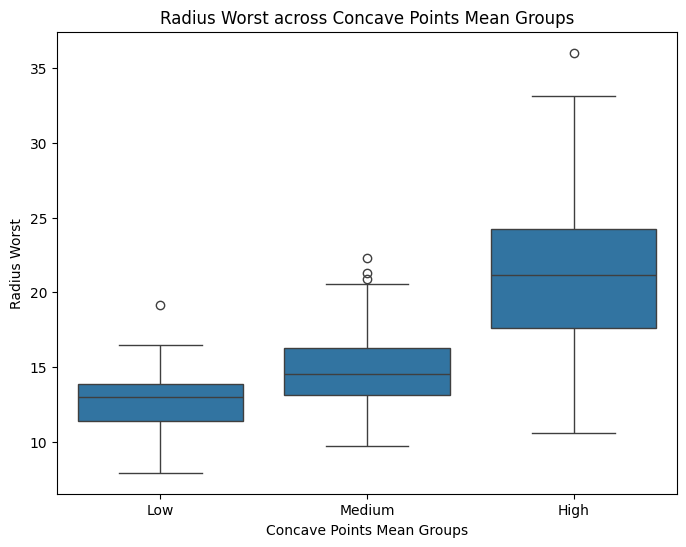

In [30]:
# Visualization using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='concave_bin', y='radius_worst', data=Update_data)
plt.title('Radius Worst across Concave Points Mean Groups')
plt.xlabel('Concave Points Mean Groups')
plt.ylabel('Radius Worst')
plt.show()

**Observations:**

This plot shows there is a significant change in Mean Radius across different level of Concave Point Mean.

### Hypothesis Testing 3:
---

Does Texture vs Radius Mean differentiate b/w Malignant & Benign

* Null Hypothesis: The Texture vs Radius Mean ratio doesn't differentiate between Malignant & Benign. (H0:𝛽1 = 0 )
* Alternate Hypothesis: The Texture vs Radius Mean can differentaite between type of breast cancer i.e. Malignant & Benign. (H1:𝛽1>0.05)

*Test: Two way ANOVA Test*

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Create categories for 'texture_mean' and 'radius_mean' using quantiles
Update_data['texture_bin'] = pd.qcut(Update_data['texture_mean'], q=3, labels=['Low', 'Medium', 'High'])
Update_data['radius_bin'] = pd.qcut(Update_data['radius_mean'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Build a formula for Two-Way ANOVA
# We are testing how 'texture_bin' and 'radius_bin' influence 'diagnosis_binary' (malignant/benign)
formula = 'diagnosis_binary ~ C(texture_bin) + C(radius_bin) + C(texture_bin):C(radius_bin)'

# Step 3: Fit the model
model = ols(formula, data=Update_data).fit()

# Step 4: Perform ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
anova_table

sum_sq     df           F        PR(>F)
C(texture_bin)                 6.861225    2.0   41.851862  1.149639e-17
C(radius_bin)                 56.881235    2.0  346.962198  9.476959e-99
C(texture_bin):C(radius_bin)   4.172254    4.0   12.724886  6.415536e-10
Residual                      45.903403  560.0         NaN           NaN

Both texture_mean and radius_mean significantly contribute to differentiating between malignant and benign cases.

Additionally, the interaction between the two is important indicating that texture_mean has a different impact on the diagnosis depending on the value of radius_mean. This means that considering them together provides a more accurate classification.

## ***Handeling Missing Values***

Treating missing or error in values, then manipulating the values or deleting as necessary.

In [32]:
columns_with_zeros = (Update_data == 0).sum()
print(columns_with_zeros)

diagnosis                                0
radius_mean                              0
texture_mean                             0
perimeter_mean                           0
area_mean                                0
smoothness_mean                          0
compactness_mean                         0
concavity_mean                          13
concave points_mean                     13
symmetry_mean                            0
fractal_dimension_mean                   0
radius_se                                0
texture_se                               0
perimeter_se                             0
area_se                                  0
smoothness_se                            0
compactness_se                           0
concavity_se                            13
concave points_se                       13
symmetry_se                              0
fractal_dimension_se                     0
radius_worst                             0
texture_worst                            0
perimeter_w

In [33]:
rows_with_zeros = (Update_data[Update_data.columns[:31]]==0).any(axis=1)
rows_with_zeros.sum()

13

Since there is very less missing data in comparison to size of whole dataset, therefore it would be best to simply remove the rows with missing data, since replacing them with mean or average could change the data since in medical cases exact reading is necessary.

In [34]:
'''These two line of codes can also be used:
# Update_data_cleaned = Update_data[~rows_with_zeros]
# Update_data_cleaned = Update_data.query(' and '.join([f'{col} != 0' for col in Update_data.columns[:31]]))
# Update_data_cleaned = Update_data.loc[~(Update_data.iloc[:, :31] == 0).any(axis=1)]'''

# Remove those rows
Update_data.drop(Update_data[(Update_data.iloc[: , :31]==0).any(axis=1)].index, inplace=True)

Update_data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
131         M        15.46         19.48          101.70      748.9   
287         B        12.89         13.12           81.89      515.9   
291         B        14.96         19.10           97.03      687.3   
403         B        12.94         16.17           83.18      507.6   
47          M        13.17         18.66           85.98      534.6   
..        ...          ...           ...             ...        ...   
449         M        21.10         20.52          138.10     1384.0   
460         M        17.08         27.15          111.20      930.9   
461         M        27.42         26.27          186.90     2501.0   
463         B        11.60         18.36           73.88      412.7   
464         B        13.17         18.22           84.28      537.3   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
131          0.10920           0.12230         0.14660              0.08087   
287          0.06955           0.03729         0.02260              0.01171   
291          0.08992           0.09823         0.05940              0.04819   
403          0.09879           0.08836         0.03296              0.02390   
47           0.11580           0.12310         0.12260              0.07340   
..               ...               ...             ...                  ...   
449          0.09684           0.11750         0.15720              0.11550   
460          0.09898           0.11100         0.10070              0.06431   
461          0.10840           0.19880         0.36350              0.16890   
463          0.08508           0.05855         0.03367              0.01777   
464          0.07466           0.05994         0.04859              0.02870   

     symmetry_mean  ...  concave points_worst  symmetry_worst  \
131         0.1931  ...               0.15140          0.2837   
287         0.1337  ...               0.05366          0.2309   
291         0.1879  ...               0.14890          0.2962   
403         0.1735  ...               0.08388          0.3297   
47          0.2128  ...               0.20880          0.3900   
..             ...  ...                   ...             ...   
449         0.1554  ...               0.22800          0.2268   
460         0.1793  ...               0.15550          0.3010   
461         0.2061  ...               0.26250          0.2641   
463         0.1516  ...               0.08288          0.3210   
464         0.1454  ...               0.10450          0.2235   

     fractal_dimension_worst  diagnosis_binary  \
131                  0.08019                 1   
287                  0.06915                 0   
291                  0.08472                 0   
403                  0.07834                 0   
47                   0.11790                 1   
..                       ...               ...   
449                  0.07425                 1   
460                  0.09060                 1   
461                  0.07427                 1   
463                  0.07863                 0   
464                  0.06925                 0   

     Area Worst to Perimeter Worst Ratio  Perimeter Mean to Radius Mean Ratio  \
131                             9.255404                             6.578266   
287                             6.601831                             6.352987   
291                             7.422548                             6.485963   
403                             6.476753                             6.428130   
47                              7.387160                             6.528474   
..                                   ...                                  ...   
449                            12.021403                             6.545024   
460                            10.834977                             6.510539   
461                            16.934713                             6.816193   
463       

## ***Handling Outlier***

### Detecting Outliers

First we will see how much the data is skewed.

In [35]:
# Calculate skewness for each feature
skewness = Update_data.iloc[:, 1:35].skew()
print(skewness)

radius_mean                            0.979572
texture_mean                           0.654223
perimeter_mean                         1.030180
area_mean                              1.657462
smoothness_mean                        0.515556
compactness_mean                       1.188945
concavity_mean                         1.401938
concave points_mean                    1.184318
symmetry_mean                          0.761761
fractal_dimension_mean                 1.327334
radius_se                              3.059367
texture_se                             1.074420
perimeter_se                           3.408764
area_se                                5.397126
smoothness_se                          2.382968
compactness_se                         1.891095
concavity_se                           5.210234
concave points_se                      1.675569
symmetry_se                            2.223363
fractal_dimension_se                   3.942741
radius_worst                           1

In [36]:
# Select numeric columns from the dataset
numeric_columns = Update_data.select_dtypes(include=[np.number])

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 'contamination' defines the expected proportion of outliers
Update_data['outlier'] = iso_forest.fit_predict(numeric_columns)

# Convert the labels (-1 for outliers, 1 for inliers) to a more interpretable format
Update_data['outlier'] = Update_data['outlier'].map({1: 'inlier', -1: 'outlier'})

# Counting the number of outliers
print(Update_data['outlier'].value_counts())

# Show rows identified as outliers
outliers = Update_data[Update_data['outlier'] == 'outlier']

outlier
inlier     528
outlier     28
Name: count, dtype: int64


The is data is highly skewed in some coloums, also all the data is positive skewed.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names,

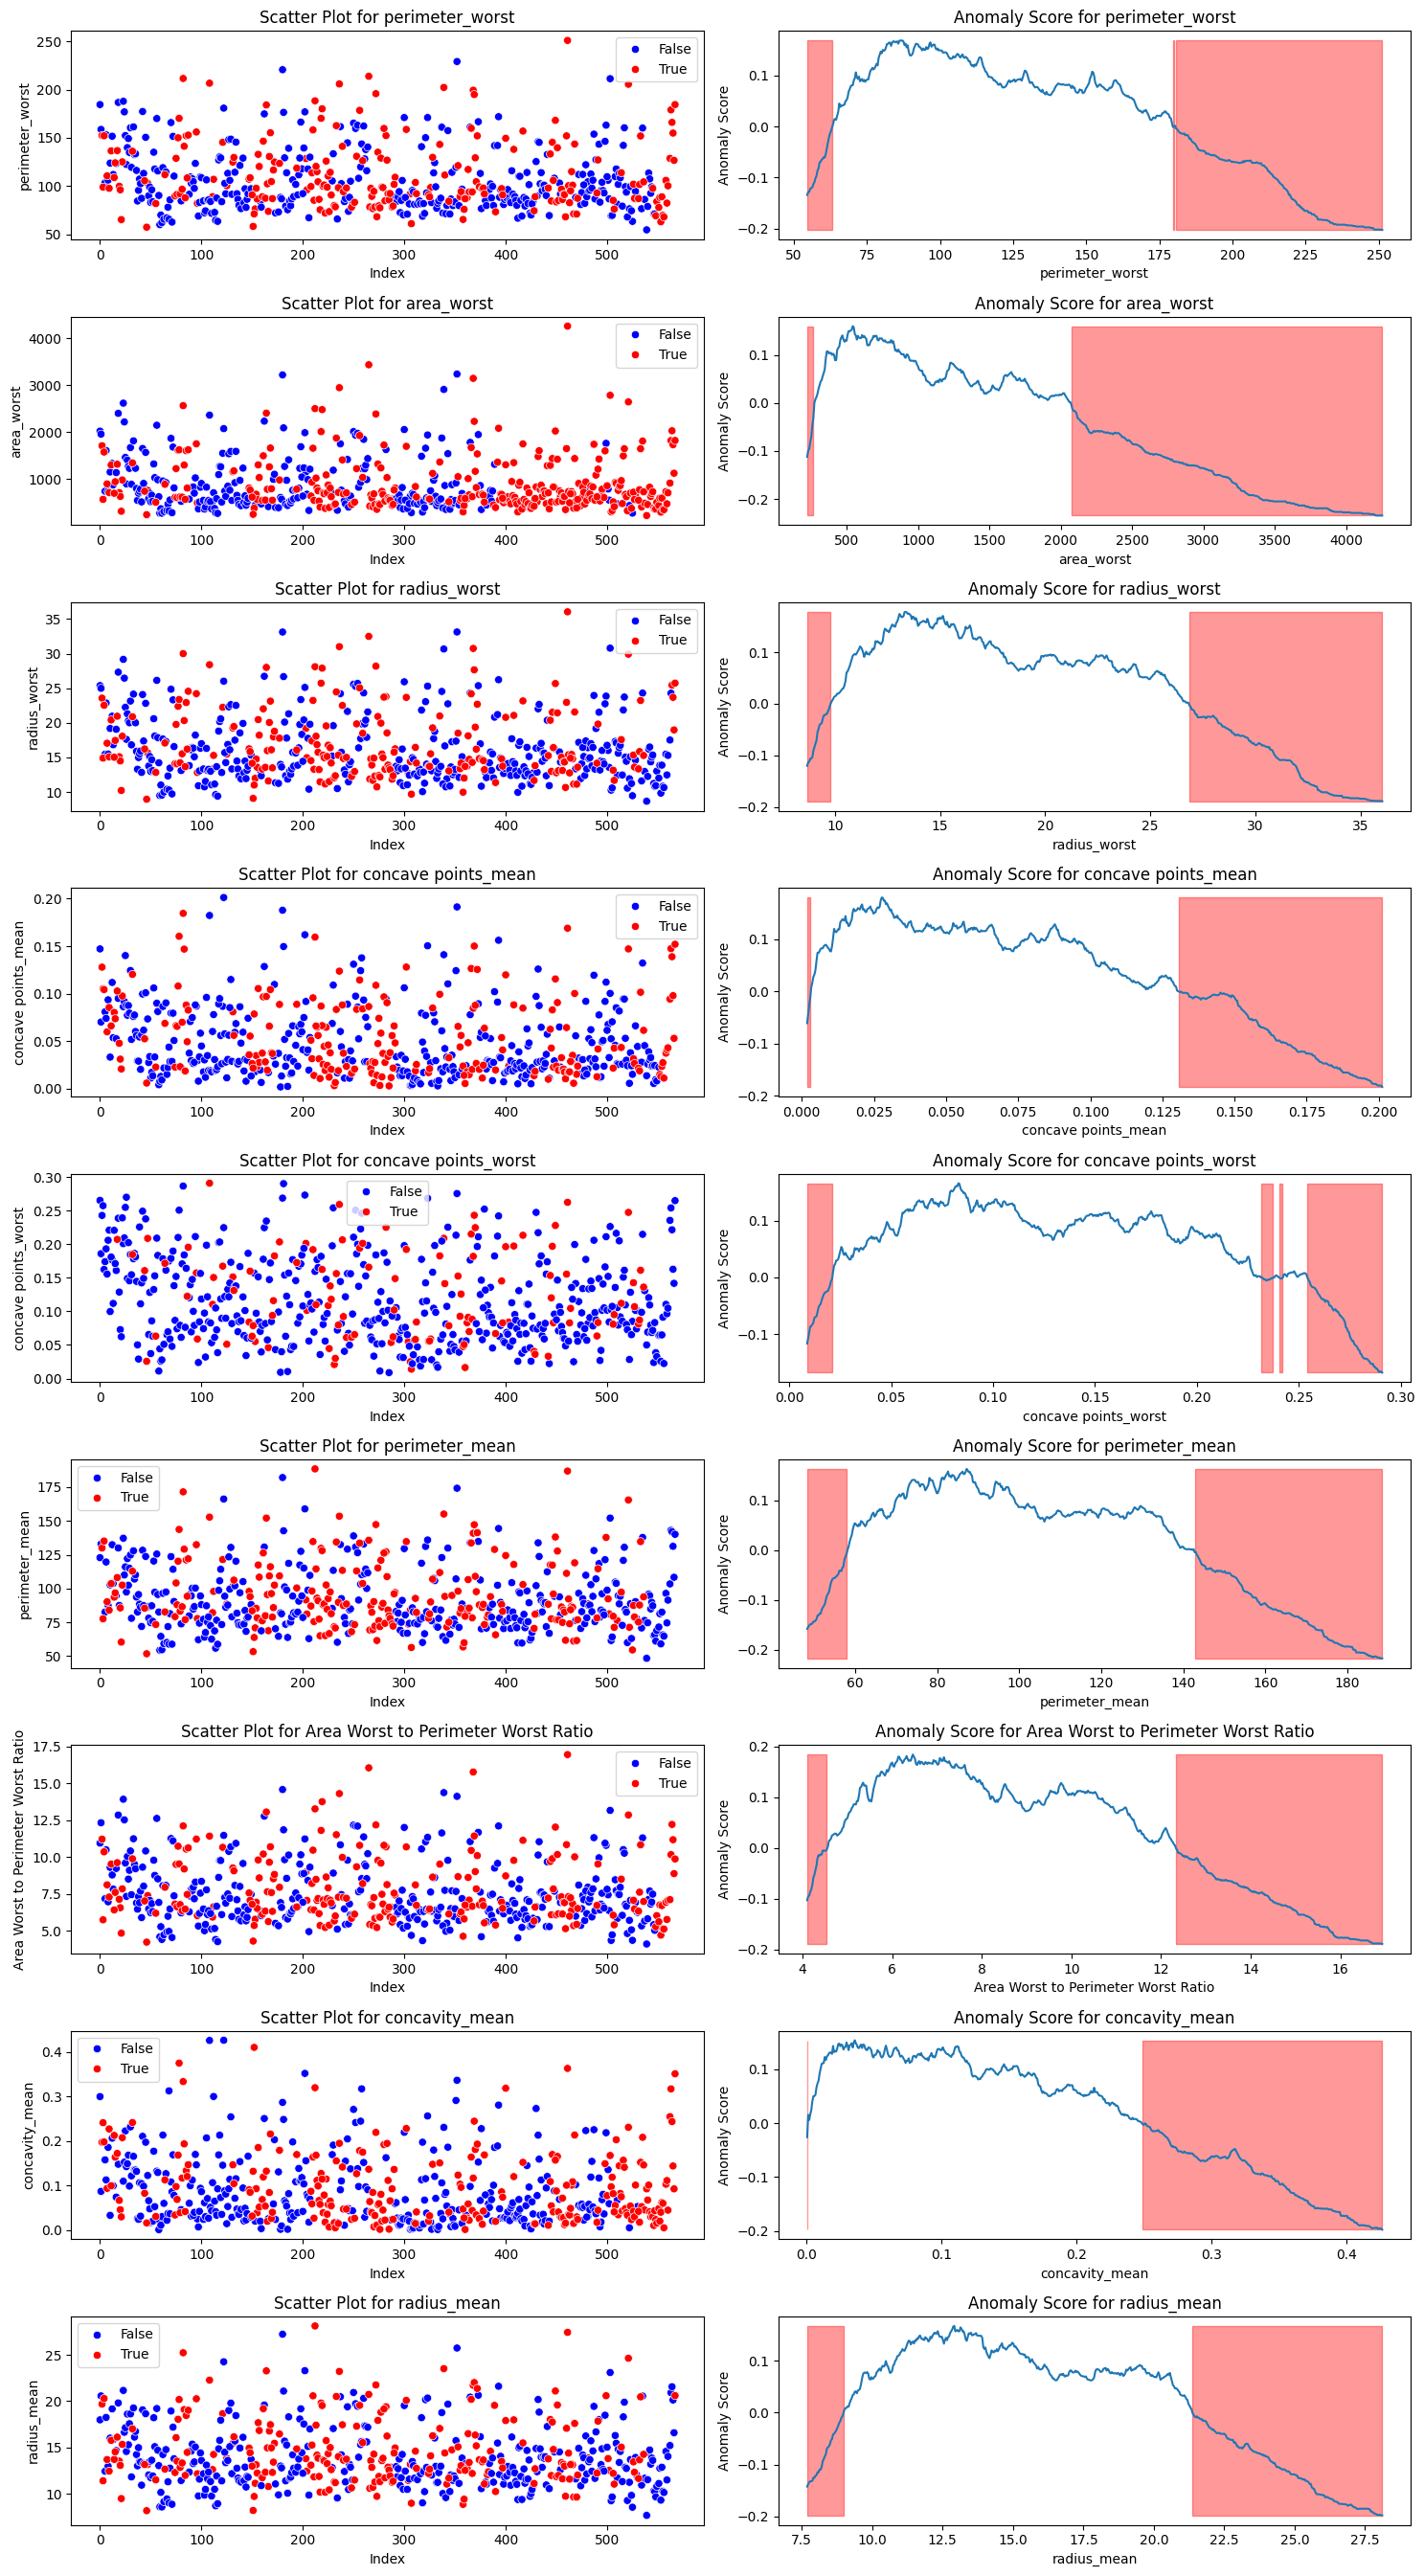

In [37]:
# List of features for which to create scatter plots and outlier detection
req_col = ['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_mean',
           'concave points_worst', 'perimeter_mean', 'Area Worst to Perimeter Worst Ratio',
           'concavity_mean', 'radius_mean']

# Create subplots for scatter plots and anomaly score plots (adjust rows and cols as needed)
fig, axes = plt.subplots(len(req_col), 2, figsize=(15, len(req_col) * 3))
axes = axes.flatten()

# Loop through the features to create plots for each
for i, feature in enumerate(req_col):
    # Initialize and fit the Isolation Forest model for the feature
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    isolation_forest.fit(Update_data[[feature]])  # Fit only the feature column

    # Define the feature range (xx) for outlier detection
    xx = np.linspace(Update_data[feature].min(), Update_data[feature].max(), len(Update_data)).reshape(-1, 1)

    # Compute anomaly scores and outliers using Isolation Forest
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    # Scatter plot of the feature with outliers highlighted
    sns.scatterplot(x=Update_data.index, y=Update_data[feature], hue=(outlier == -1), palette=['blue', 'red'], ax=axes[2 * i])
    axes[2 * i].set_title(f'Scatter Plot for {feature}')
    axes[2 * i].set_xlabel('Index')
    axes[2 * i].set_ylabel(feature)

    # Anomaly score plot for the feature
    axes[2 * i + 1].plot(xx, anomaly_score, label='anomaly score')
    axes[2 * i + 1].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier == -1, color='r', alpha=.4, label='outlier region')
    axes[2 * i + 1].set_title(f'Anomaly Score for {feature}')
    axes[2 * i + 1].set_xlabel(feature)
    axes[2 * i + 1].set_ylabel('Anomaly Score')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

Bifercating the data based on diagnosis will us the clear picture whether there is seperation in outliers of both diagnosis, or are they mixed in together. This would help us better treatment of outliers.

In [38]:
# Biffercating data on the basis of diagnosis
m_data= Update_data[Update_data['diagnosis']=='M']
b_data= Update_data[Update_data['diagnosis']=='B']

# Reset indices for both datasets
m_data = m_data.reset_index(drop=True)
b_data = b_data.reset_index(drop=True)

In [43]:
m_data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        15.46         19.48          101.70      748.9   
1           M        13.17         18.66           85.98      534.6   
2           M        20.26         23.03          132.40     1264.0   
3           M        22.27         19.67          152.80     1509.0   
4           M        18.66         17.12          121.40     1077.0   
..        ...          ...           ...             ...        ...   
207         M        20.58         22.14          134.70     1290.0   
208         M        17.42         25.56          114.50      948.0   
209         M        21.10         20.52          138.10     1384.0   
210         M        17.08         27.15          111.20      930.9   
211         M        27.42         26.27          186.90     2501.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.10920            0.1223          0.1466              0.08087   
1            0.11580            0.1231          0.1226              0.07340   
2            0.09078            0.1313          0.1465              0.08683   
3            0.13260            0.2768          0.4264              0.18230   
4            0.10540            0.1100          0.1457              0.08665   
..               ...               ...             ...                  ...   
207          0.09090            0.1348          0.1640              0.09561   
208          0.10060            0.1146          0.1682              0.06597   
209          0.09684            0.1175          0.1572              0.11550   
210          0.09898            0.1110          0.1007              0.06431   
211          0.10840            0.1988          0.3635              0.16890   

     symmetry_mean  ...  symmetry_worst  fractal_dimension_worst  \
0           0.1931  ...          0.2837                  0.08019   
1           0.2128  ...          0.3900                  0.11790   
2           0.2095  ...          0.3689                  0.08368   
3           0.2556  ...          0.4055                  0.09789   
4           0.1966  ...          0.2894                  0.08456   
..             ...  ...             ...                      ...   
207         0.1765  ...          0.2909                  0.05865   
208         0.1308  ...          0.1603                  0.06818   
209         0.1554  ...          0.2268                  0.07425   
210         0.1793  ...          0.3010                  0.09060   
211         0.2061  ...          0.2641                  0.07427   

     diagnosis_binary  Area Worst to Perimeter Worst Ratio  \
0                   1                             9.255404   
1                   1                             7.387160   
2                   1                            11.210762   
3                   1                            11.411992   
4                   1                            10.653370   
..                ...                                  ...   
207                 1                            10.461150   
208                 1                             8.480066   
209                 1                            12.021403   
210                 1                            10.834977   
211                 1                            16.934713   

     Perimeter Mean to Radius Mean Ratio  Radius Worst to Radius Mean Ratio  \
0                               6.578266                           1.245796   
1                               6.528474                           1.189825   
2                               6.535044                           1.195459   
3                               6.861248                           1.275258   
4                               6.505895                           1.192390   
..                                   ...                                ...   
207                             6.545190                           1.129252   
208     

In [40]:
m_skew= m_data.iloc[:, 1:35].skew()
m_skew

radius_mean                            0.501902
texture_mean                           0.703543
perimeter_mean                         0.604931
area_mean                              1.117668
smoothness_mean                        0.479751
compactness_mean                       0.836768
concavity_mean                         0.901628
concave points_mean                    0.739092
symmetry_mean                          0.811960
fractal_dimension_mean                 0.894766
radius_se                              2.519402
texture_se                             1.536328
perimeter_se                           2.810137
area_se                                4.345029
smoothness_se                          3.958782
compactness_se                         1.857940
concavity_se                           1.623970
concave points_se                      1.437999
symmetry_se                            2.519581
fractal_dimension_se                   1.672011
radius_worst                           0.631469
texture_worst                          0.539884
perimeter_worst                        0.748179
area_worst                             1.307762
smoothness_worst                       0.437344
compactness_worst                      1.101551
concavity_worst                        0.912652
concave points_worst                  -0.092809
symmetry_worst                         1.149001
fractal_dimension_worst                1.363200
diagnosis_binary                       0.000000
Area Worst to Perimeter Worst Ratio    0.629896
Perimeter Mean to Radius Mean Ratio    0.870423
Radius Worst to Radius Mean Ratio      0.862992
dtype: float64

In [41]:
b_skew= b_data.iloc[:, 1:35].skew()
b_skew

radius_mean                            0.006998
texture_mean                           0.970376
perimeter_mean                         0.044055
area_mean                              0.404913
smoothness_mean                        0.755120
compactness_mean                       1.213218
concavity_mean                         3.564591
concave points_mean                    1.049095
symmetry_mean                          0.737145
fractal_dimension_mean                 1.704495
radius_se                              1.572327
texture_se                             0.844599
perimeter_se                           1.226100
area_se                                1.666590
smoothness_se                          1.488985
compactness_se                         2.178121
concavity_se                           6.367590
concave points_se                      2.540068
symmetry_se                            1.077569
fractal_dimension_se                   4.350681
radius_worst                           0.031606
texture_worst                          0.710788
perimeter_worst                        0.087402
area_worst                             0.414662
smoothness_worst                       0.391897
compactness_worst                      1.110339
concavity_worst                        2.649916
concave points_worst                   0.313118
symmetry_worst                         0.290406
fractal_dimension_worst                1.438590
diagnosis_binary                       0.000000
Area Worst to Perimeter Worst Ratio    0.014089
Perimeter Mean to Radius Mean Ratio    1.036754
Radius Worst to Radius Mean Ratio      0.645756
dtype: float64

In [42]:
# Select numeric columns from the dataset
numeric_columns = m_data.select_dtypes(include=[np.number])

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.045, random_state=20)  # 'contamination' defines the expected proportion of outliers
m_data['outlier'] = iso_forest.fit_predict(numeric_columns)

# Convert the labels (-1 for outliers, 1 for inliers) to a more interpretable format
m_data['outlier'] = m_data['outlier'].map({1: 'inlier', -1: 'outlier'})

# Counting the number of outliers
print(m_data['outlier'].value_counts())

# Show rows identified as outliers
m_outliers = m_data[m_data['outlier'] == 'outlier']
m_outliers

outlier
inlier     202
outlier     10
Name: count, dtype: int64


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
3           M        22.27         19.67          152.80     1509.0   
20          M        19.17         24.80          132.40     1123.0   
37          M        14.99         25.20           95.54      698.8   
61          M        24.25         20.20          166.20     1761.0   
76          M        14.22         23.12           94.37      609.9   
142         M        20.18         23.97          143.70     1245.0   
151         M        28.11         18.47          188.50     2499.0   
175         M        11.42         20.38           77.58      386.1   
208         M        17.42         25.56          114.50      948.0   
211         M        27.42         26.27          186.90     2501.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
3            0.13260           0.27680         0.42640              0.18230   
20           0.09740           0.24580         0.20650              0.11180   
37           0.09387           0.05131         0.02398              0.02899   
61           0.14470           0.28670         0.42680              0.20120   
76           0.10750           0.24130         0.19810              0.06618   
142          0.12860           0.34540         0.37540              0.16040   
151          0.11420           0.15160         0.32010              0.15950   
175          0.14250           0.28390         0.24140              0.10520   
208          0.10060           0.11460         0.16820              0.06597   
211          0.10840           0.19880         0.36350              0.16890   

     symmetry_mean  ...  symmetry_worst  fractal_dimension_worst  \
3           0.2556  ...          0.4055                  0.09789   
20          0.2397  ...          0.3176                  0.10230   
37          0.1565  ...          0.1565                  0.05504   
61          0.2655  ...          0.3222                  0.08009   
76          0.2384  ...          0.5166                  0.14460   
142         0.2906  ...          0.5440                  0.09964   
151         0.1648  ...          0.1648                  0.05525   
175         0.2597  ...          0.6638                  0.17300   
208         0.1308  ...          0.1603                  0.06818   
211         0.2061  ...          0.2641                  0.07427   

     diagnosis_binary  Area Worst to Perimeter Worst Ratio  \
3                   1                            11.411992   
20                  1                             8.780488   
37                  1                             7.314214   
61                  1                            11.459370   
76                  1                             7.165414   
142                 1                             9.530241   
151                 1                            13.257294   
175                 1                             5.741883   
208                 1                             8.480066   
211                 1                            16.934713   

     Perimeter Mean to Radius Mean Ratio  Radius Worst to Radius Mean Ratio  \
3                               6.861248                           1.275258   
20                              6.906625                           1.093375   
37                              6.373582                           1.000000   
61                              6.853608                           1.072990   
76                              6.636428                           1.106892   
142                             7.120912                           1.158077   
151                             6.705799                           1.000000   
175                             6.793345                           1.305604   
208                             6.572905                           1.037313   
211                             6.816193                           1.314369   

     concave_bin  texture_bin  radius_bin  outlier

In [45]:
# Select numeric columns from the dataset
numeric_columns = b_data.select_dtypes(include=[np.number])

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.045, random_state=20)  # 'contamination' defines the expected proportion of outliers
b_data['outlier'] = iso_forest.fit_predict(numeric_columns)

# Convert the labels (-1 for outliers, 1 for inliers) to a more interpretable format
b_data['outlier'] = b_data['outlier'].map({1: 'inlier', -1: 'outlier'})

# Counting the number of outliers
print(b_data['outlier'].value_counts())

# Show rows identified as outliers
b_outliers = b_data[b_data['outlier'] == 'outlier']
b_outliers

outlier
inlier     328
outlier     16
Name: count, dtype: int64


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
5           B       14.260         19.65           97.83      629.9   
39          B        9.029         17.33           58.79      250.5   
41          B        8.888         14.64           58.79      244.0   
60          B        8.950         15.76           58.74      245.2   
78          B        9.904         18.06           64.60      302.4   
114         B        9.042         18.90           60.07      244.5   
135         B       10.570         20.22           70.15      338.3   
162         B       14.690         13.98           98.22      656.1   
199         B        9.268         12.87           61.49      248.7   
200         B        9.676         13.14           64.12      272.5   
214         B        7.691         25.44           48.34      170.4   
242         B        9.731         15.34           63.78      300.2   
274         B       11.260         19.96           73.72      394.1   
318         B       14.410         19.73           96.03      651.0   
331         B       17.850         13.23          114.60      992.1   
339         B        8.219         20.70           53.27      203.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
5            0.07837           0.22330         0.30030              0.07798   
39           0.10660           0.14130         0.31300              0.04375   
41           0.09783           0.15310         0.08606              0.02872   
60           0.09462           0.12430         0.09263              0.02308   
78           0.09699           0.12940         0.13070              0.03716   
114          0.09968           0.19720         0.19750              0.04908   
135          0.09073           0.16600         0.22800              0.05941   
162          0.10310           0.18360         0.14500              0.06300   
199          0.16340           0.22390         0.09730              0.05252   
200          0.12550           0.22040         0.11880              0.07038   
214          0.08668           0.11990         0.09252              0.01364   
242          0.10720           0.15990         0.41080              0.07857   
274          0.08020           0.11810         0.09274              0.05588   
318          0.08757           0.16760         0.13620              0.06602   
331          0.07838           0.06217         0.04445              0.04178   
339          0.09405           0.13050         0.13210              0.02168   

     symmetry_mean  ...  symmetry_worst  fractal_dimension_worst  \
5           0.1704  ...          0.2398                  0.10820   
39          0.2111  ...          0.4228                  0.11750   
41          0.1902  ...          0.2254                  0.10840   
60          0.1305  ...          0.1652                  0.07722   
78          0.1669  ...          0.2614                  0.11620   
114         0.2330  ...          0.3135                  0.10550   
135         0.2188  ...          0.2597                  0.12000   
162         0.2086  ...          0.2827                  0.09208   
199         0.2378  ...          0.3038                  0.12520   
200         0.2057  ...          0.2848                  0.13640   
214         0.2037  ...          0.2790                  0.10660   
242         0.2548  ...          0.3108                  0.12590   
274         0.2595  ...          0.2955                  0.07009   
318         0.1714  ...          0.2272                  0.08799   
331         0.1220  ...          0.1783                  0.05871   
339         0.2222  ...          0.3322                  0.14860   

     diagnosis_binary  Area Worst to Perimeter Worst Ratio  \
5                   0                             6.626168   
39                  0                             4.957252   
41                  0                             4.546036   
60                  0                          

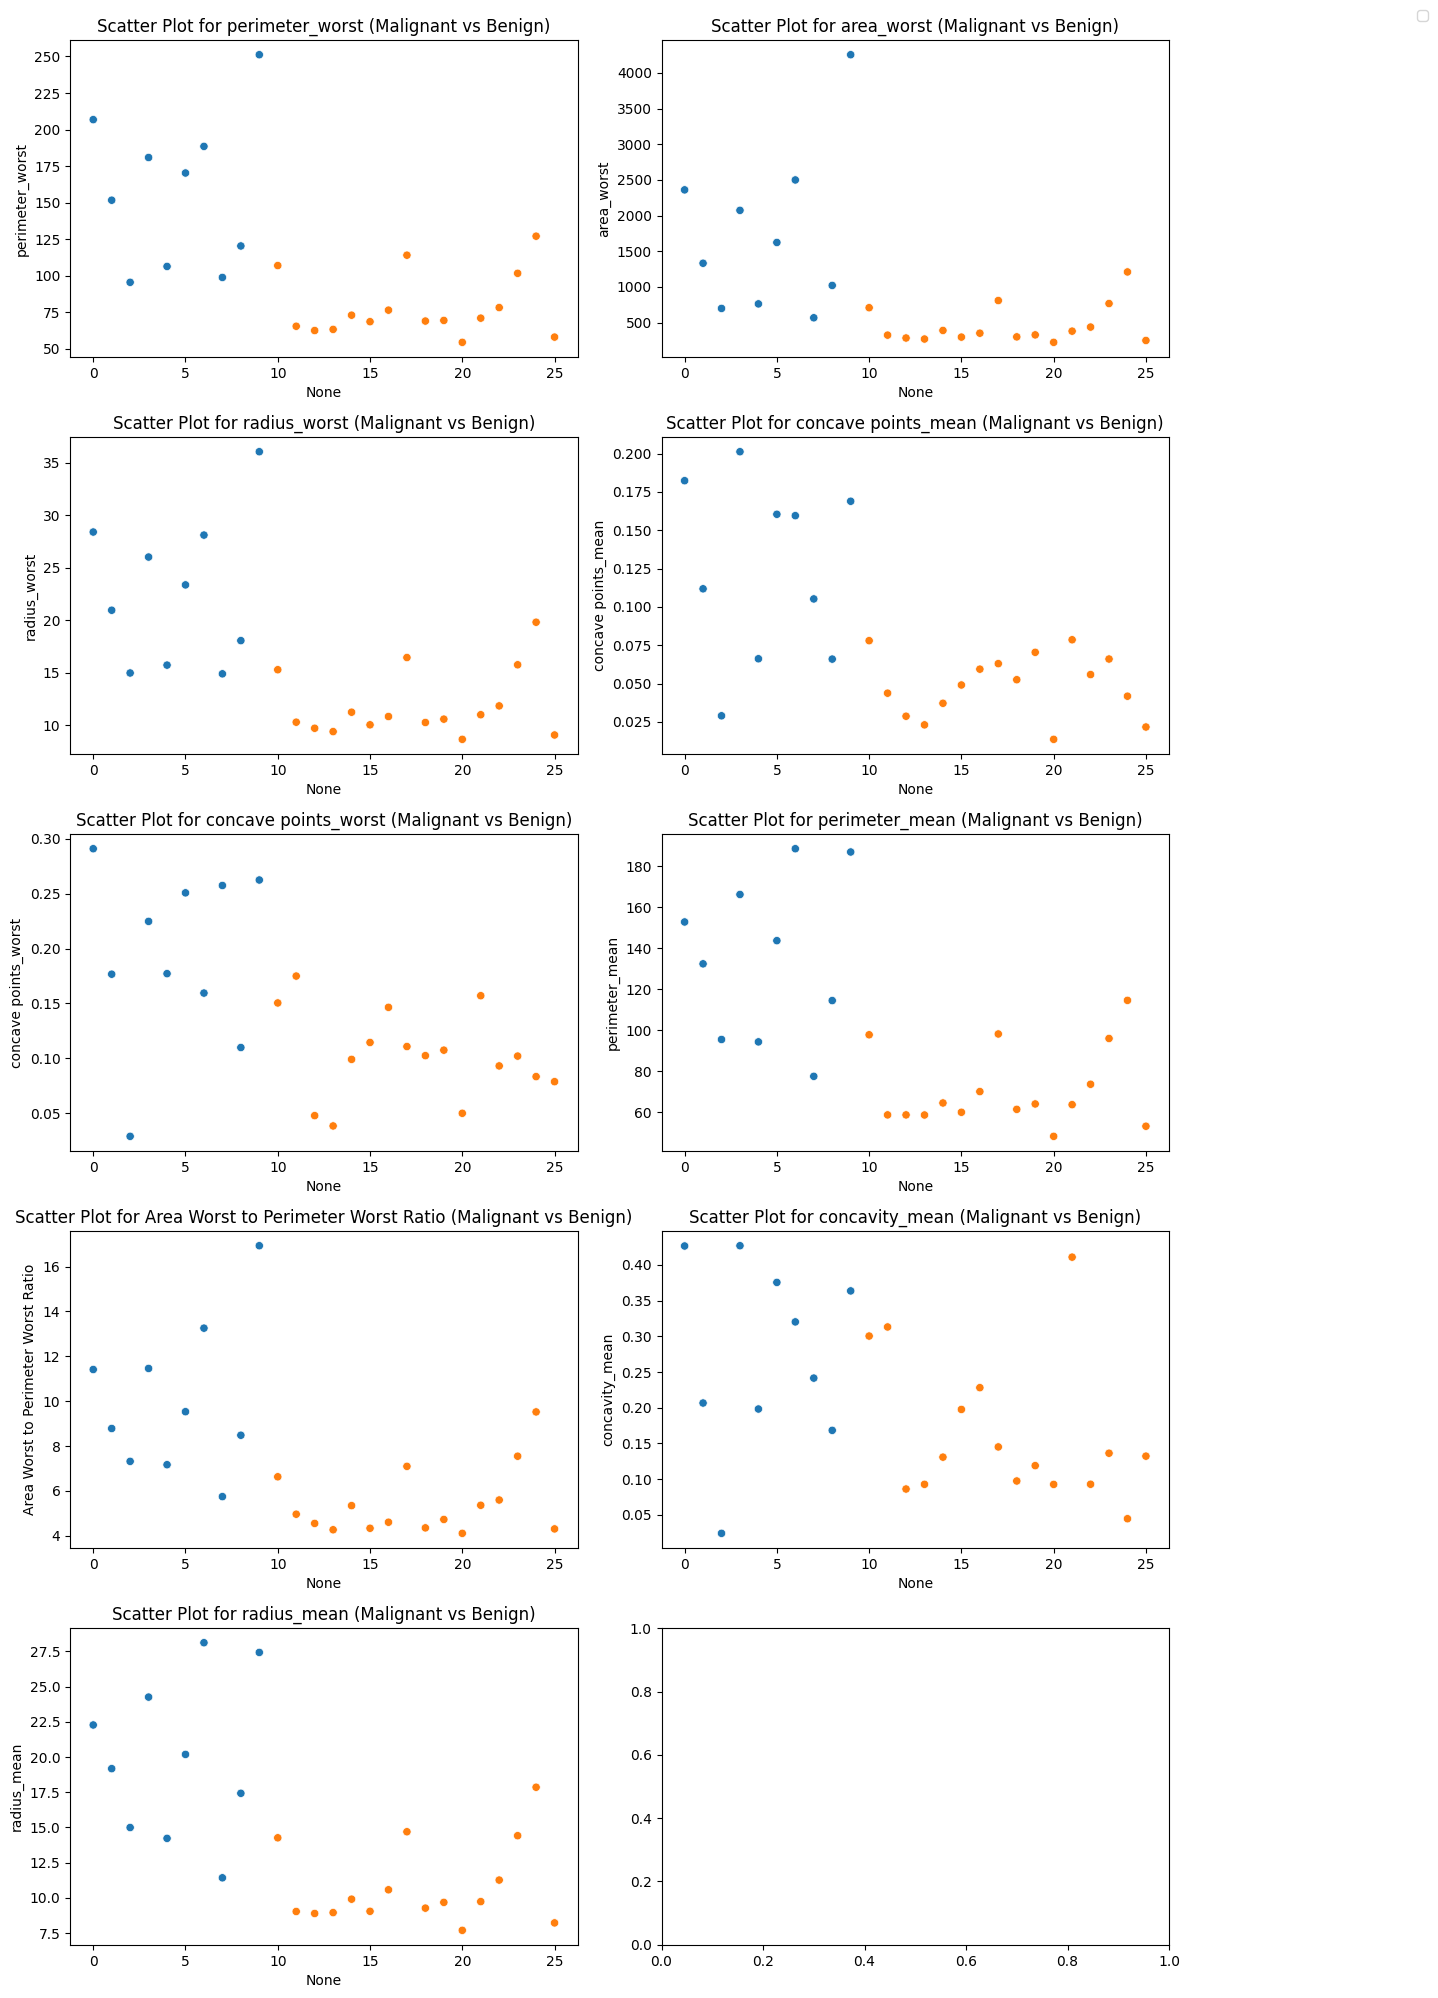

In [46]:
# Reset indices for both datasets
m_outliers = m_outliers.reset_index(drop=True)
b_outliers = b_outliers.reset_index(drop=True)

# Concatenate the datasets
combined_outliers = pd.concat([m_outliers, b_outliers], ignore_index=True)

# Plot scatter plots with hue for diagnosis
fig, axes = plt.subplots(5, 2, figsize=(12, 20))  # Correct figure size for two columns

for i, feature in enumerate(req_col):
    # Find the correct position in the grid (axes[i//2, i%2] for two columns)
    row = i // 2
    col = i % 2
    sns.scatterplot(x=combined_outliers.index, y=combined_outliers[feature], hue=combined_outliers['diagnosis'], ax=axes[row, col], legend=False)
    axes[row, col].set_title(f"Scatter Plot for {feature} (Malignant vs Benign)")

'''# Remove any extra empty plots
if len(req_col) % 2 != 0:
    fig.delaxes(axes[-1])'''

# Add the legend only once, on the last plot (or customize its position)
handles, labels = axes[0, 0].get_legend_handles_labels()  # Get handles from the first plot
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

We can see that there is no overlap in the outliers of both diagnosis

### Treating Outliers

Using Z score method we will remove the outliers and make the data symetrically skewed

In [47]:
# Calculate Z-scores for each feature in Update_data_transformed
z_scores = np.abs(zscore(Update_data.iloc[:,1:35].drop(columns=['diagnosis_binary'])))

# Set a threshold for the Z-score (e.g., 3 standard deviations)
threshold = 6

# Identify rows where any feature's Z-score is greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataset
Update_data_transformed = Update_data[~outliers]
Update_data_transformed

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
131         M        15.46         19.48          101.70      748.9   
287         B        12.89         13.12           81.89      515.9   
291         B        14.96         19.10           97.03      687.3   
403         B        12.94         16.17           83.18      507.6   
47          M        13.17         18.66           85.98      534.6   
..        ...          ...           ...             ...        ...   
360         B        12.54         18.07           79.42      491.9   
449         M        21.10         20.52          138.10     1384.0   
460         M        17.08         27.15          111.20      930.9   
463         B        11.60         18.36           73.88      412.7   
464         B        13.17         18.22           84.28      537.3   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
131          0.10920           0.12230        0.146600             0.080870   
287          0.06955           0.03729        0.022600             0.011710   
291          0.08992           0.09823        0.059400             0.048190   
403          0.09879           0.08836        0.032960             0.023900   
47           0.11580           0.12310        0.122600             0.073400   
..               ...               ...             ...                  ...   
360          0.07436           0.02650        0.001194             0.005449   
449          0.09684           0.11750        0.157200             0.115500   
460          0.09898           0.11100        0.100700             0.064310   
463          0.08508           0.05855        0.033670             0.017770   
464          0.07466           0.05994        0.048590             0.028700   

     symmetry_mean  ...  symmetry_worst  fractal_dimension_worst  \
131         0.1931  ...          0.2837                  0.08019   
287         0.1337  ...          0.2309                  0.06915   
291         0.1879  ...          0.2962                  0.08472   
403         0.1735  ...          0.3297                  0.07834   
47          0.2128  ...          0.3900                  0.11790   
..             ...  ...             ...                      ...   
360         0.1528  ...          0.2233                  0.05521   
449         0.1554  ...          0.2268                  0.07425   
460         0.1793  ...          0.3010                  0.09060   
463         0.1516  ...          0.3210                  0.07863   
464         0.1454  ...          0.2235                  0.06925   

     diagnosis_binary  Area Worst to Perimeter Worst Ratio  \
131                 1                             9.255404   
287                 0                             6.601831   
291                 0                             7.422548   
403                 0                             6.476753   
47                  1                             7.387160   
..                ...                                  ...   
360                 0                             6.746141   
449                 1                            12.021403   
460                 1                            10.834977   
463                 0                             5.988147   
464                 0                             7.230284   

     Perimeter Mean to Radius Mean Ratio  Radius Worst to Radius Mean Ratio  \
131                             6.578266                           1.245796   
287                             6.352987                           1.056633   
291                             6.485963                           1.086230   
403                             6.428130                           1.071097   
47                              6.528474                           1.189825   
..                                   ...                                ...   
360                             6.333333                           1.094099   
449     

In [48]:
# Select features to standardize (excluding non-numeric columns)
features_to_standardize = Update_data_transformed.select_dtypes(include=['float64', 'int64']).drop(columns=['diagnosis_binary']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
Update_data_transformed[features_to_standardize] = scaler.fit_transform(Update_data_transformed[features_to_standardize])

# Display the standardized data
Update_data_transformed.head()

<ipython-input-48-2ac261f34cad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Update_data_transformed[features_to_standardize] = scaler.fit_transform(Update_data_transformed[features_to_standardize])


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
131         M     0.370600      0.059237        0.396680   0.270943   
287         B    -0.389511     -1.439168       -0.454451  -0.428011   
291         B     0.222719     -0.030291        0.196035   0.086155   
403         B    -0.374722     -0.720593       -0.399026  -0.452909   
47          M    -0.306697     -0.133954       -0.278725  -0.371914   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
131         0.937977          0.366794        0.786391             0.838416   
287        -1.951470         -1.316889       -0.863528            -0.991682   
291        -0.467030         -0.109929       -0.373875            -0.026355   
403         0.179361         -0.305412       -0.725680            -0.669112   
47          1.418944          0.382639        0.467052             0.640747   

     symmetry_mean  ...  symmetry_worst  fractal_dimension_worst  \
131       0.466679  ...       -0.100053                -0.200550   
287      -1.764966  ...       -1.019048                -0.864767   
291       0.271316  ...        0.117512                 0.071995   
403      -0.269689  ...        0.700587                -0.311855   
47        1.206804  ...        1.750121                 2.068257   

     diagnosis_binary  Area Worst to Perimeter Worst Ratio  \
131                 1                             0.782470   
287                 0                            -0.471246   
291                 0                            -0.083487   
403                 0                            -0.530340   
47                  1                            -0.100207   

     Perimeter Mean to Radius Mean Ratio  Radius Worst to Radius Mean Ratio  \
131                             0.704842                           1.266988   
287                            -1.106621                          -1.062011   
291                            -0.037369                          -0.697610   
403                            -0.502399                          -0.883924   
47                              0.304461                           0.577873   

     concave_bin  texture_bin  radius_bin  outlier  
131         High       Medium        High   inlier  
287          Low          Low      Medium   inlier  
291       Medium       Medium        High   inlier  
403          Low          Low      Medium   inlier  
47          High       Medium      Medium   inlier  

[5 rows x 39 columns]

In [49]:
Update_data_transformed_skew= Update_data_transformed.iloc[:, 1:35].skew()
Update_data_transformed_skew

radius_mean                            0.888068
texture_mean                           0.672066
perimeter_mean                         0.929723
area_mean                              1.398407
smoothness_mean                        0.501075
compactness_mean                       1.115662
concavity_mean                         1.358791
concave points_mean                    1.189932
symmetry_mean                          0.693946
fractal_dimension_mean                 1.094278
radius_se                              1.686874
texture_se                             1.098056
perimeter_se                           1.852713
area_se                                2.215351
smoothness_se                          1.741548
compactness_se                         1.529030
concavity_se                           1.698713
concave points_se                      1.184699
symmetry_se                            1.704490
fractal_dimension_se                   2.136515
radius_worst                           1.069551
texture_worst                          0.503817
perimeter_worst                        1.086073
area_worst                             1.674388
smoothness_worst                       0.407931
compactness_worst                      1.265614
concavity_worst                        1.008787
concave points_worst                   0.565582
symmetry_worst                         1.147865
fractal_dimension_worst                1.146742
diagnosis_binary                       0.512761
Area Worst to Perimeter Worst Ratio    1.077462
Perimeter Mean to Radius Mean Ratio    0.955682
Radius Worst to Radius Mean Ratio      1.647670
dtype: float64

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


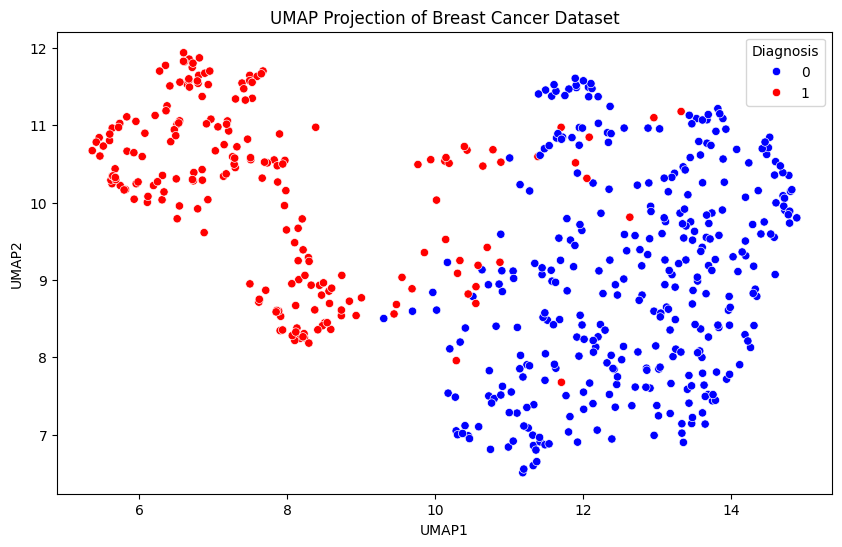

In [50]:
# Assuming 'Update_data' is your dataset and 'diagnosis_binary' is your target variable
X = Update_data_transformed.iloc[:, 1:35].drop(columns=['diagnosis_binary'])  # Features
y = Update_data_transformed['diagnosis_binary']  # Target

# Initialize the UMAP model
umap_model = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the data
X_umap = umap_model.fit_transform(X)

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['diagnosis_binary'] = y.values

# Plot the UMAP result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='diagnosis_binary', data=umap_df, palette=['blue', 'red'])
plt.title('UMAP Projection of Breast Cancer Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Diagnosis')
plt.show()

**Observation:**

The UMAP projection gives a good visual representation of the dataset, showing that the majority of the cases can be separated into distinct classes.

* There are two distinct clusters, primarily dominated by blue points (benign) on the right and red points (malignant) on the left.

* The blue cluster (benign) is more spread out, indicating more variability within the benign cases.

* The red cluster (malignant) appears slightly more compact, which might suggest a more consistent pattern in the features of malignant cases.

* While the clusters are generally well-separated, there is a small amount of overlap between the blue and red points, particularly where the clusters meet. This could indicate a few misclassified or ambiguous cases where the features for benign and malignant diagnoses are similar.

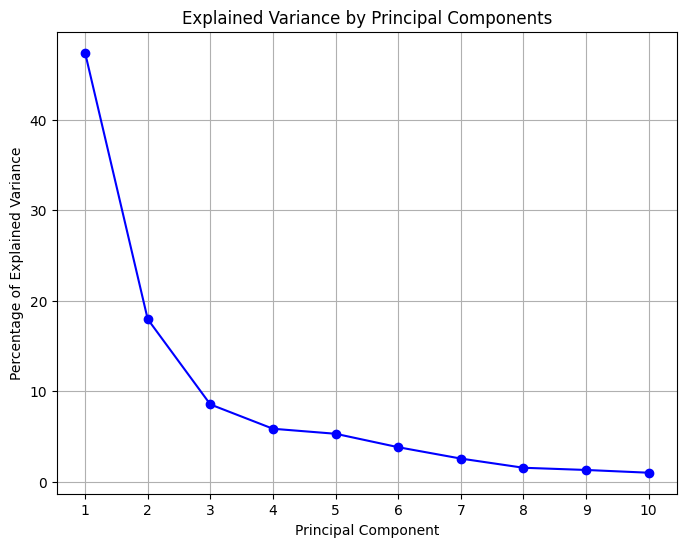

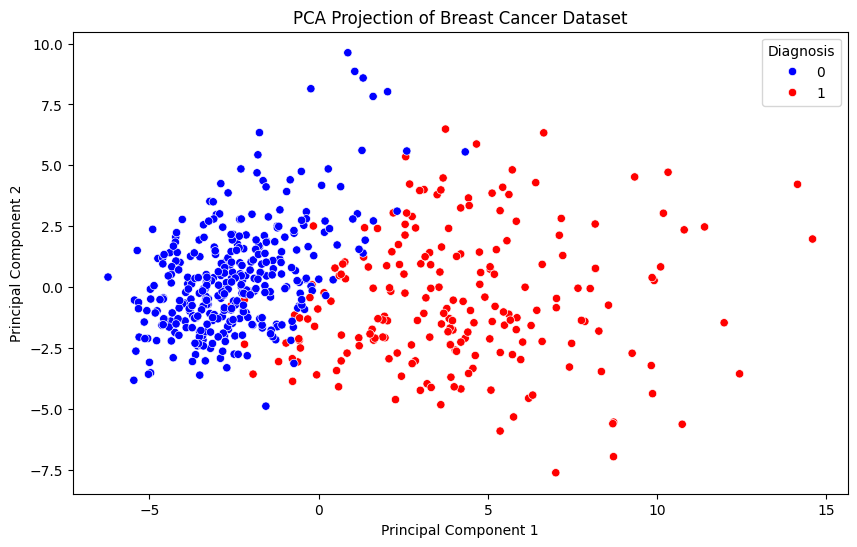

In [51]:
# Dropping the diagnosis_binary column for PCA
X_pca = Update_data_transformed.iloc[:, 1:35].drop(columns=['diagnosis_binary'])

# Applying PCA with 10 components
pca = PCA(n_components=10)
X_pca_transformed = pca.fit_transform(X_pca)

# Get the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio for each component
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), explained_variance * 100, marker='o', linestyle='-', color='b')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Visualizing the first two principal components (you can extend this)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_transformed[:, 0], y=X_pca_transformed[:, 1], hue=Update_data_transformed['diagnosis_binary'], palette=['blue', 'red'])
plt.title('PCA Projection of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.show()

Given the high number of features in our dataset, dimensionality reduction is essential to prevent overfitting and to improve model interpretability. We first applied PCA (Principal Component Analysis), which helps in capturing the most variance in the data while reducing its complexity. By using 3 components, we retain around 95% of the variance, ensuring that critical information is preserved. This process will also help in reducing the computational cost of training machine learning models and lead to better generalization.

In [52]:
# Dropping the diagnosis_binary column for PCA
X_pca = Update_data_transformed.iloc[:, 1:35].drop(columns=['diagnosis_binary'])

# Applying PCA with 5 components
pca = PCA(n_components=3)
X_pca_reduced = pca.fit_transform(X_pca)

# Convert the transformed data back to a DataFrame for easier handling
X_pca_reduced_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(3)])

# Optionally, you can concatenate this with the diagnosis if needed
medi_mod_df = pd.concat([X_pca_reduced_df, Update_data_transformed['diagnosis_binary'].reset_index(drop=True)], axis=1)

# Display the reduced DataFrame
medi_mod_df.head()

PC1       PC2       PC3  diagnosis_binary
0  1.943597 -1.200130 -1.376838                 1
1 -4.785572 -2.200067 -0.171808                 0
2 -0.580557 -0.779382 -0.886183                 0
3 -2.887227 -0.459738 -1.465193                 0
4  1.738407  2.405085 -3.375496                 1

In [53]:
medi_mod_df.shape

(545, 4)

### Checking for Imbalance in Data

<Axes: ylabel='count'>

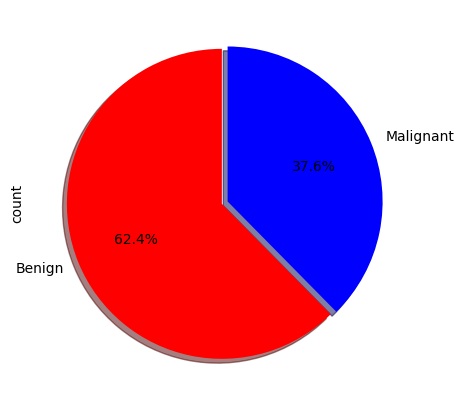

In [54]:
medi_mod_df['diagnosis_binary'].value_counts().plot(kind='pie', figsize=(5,6), autopct="%1.1f%%", startangle=90,
                                                     shadow=True, labels=['Benign', 'Malignant'], colors=['red','blue'], explode=[0.01,0.03])

The data is little imabalanced, but it is not very extreme, thus we can work with it.

## ***ML Model Implementation***

### Model 1: **Random Forest**

For our first machine learning model, we have chosen Random Forest, an ensemble method known for its robustness and ability to handle high-dimensional datasets. Random Forest is particularly useful in medical data analysis because it can model complex relationships between features and perform well with unbalanced datasets. To evaluate its performance, we will use metrics such as accuracy, F1-score, and AUC-ROC curve, which are particularly important in binary classification problems like breast cancer diagnosis.

In [56]:
# Define the features and the target variable
X = medi_mod_df.drop(columns=['diagnosis_binary'])  # Features (PC1 to PC5)
y = medi_mod_df['diagnosis_binary']  # Target (diagnosis_binary)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 89.91%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        68
           1       0.84      0.90      0.87        41

    accuracy                           0.90       109
   macro avg       0.89      0.90      0.89       109
weighted avg       0.90      0.90      0.90       109



AUC Score: 0.98


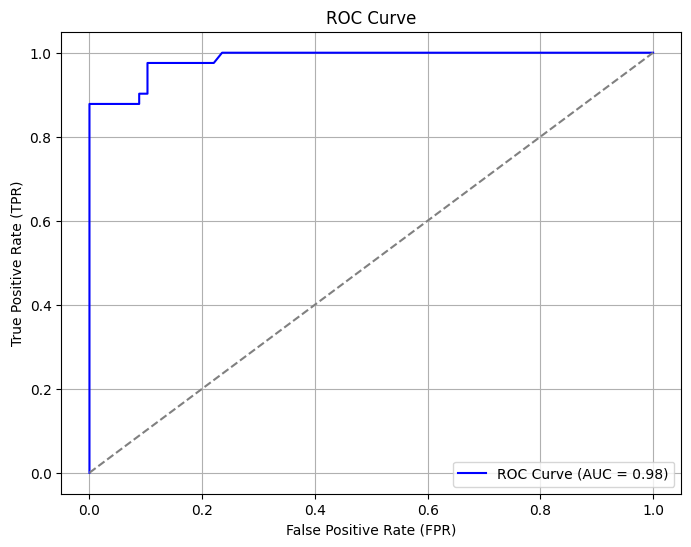

In [57]:
# Get predicted probabilities for the test set (for the positive class, 1)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

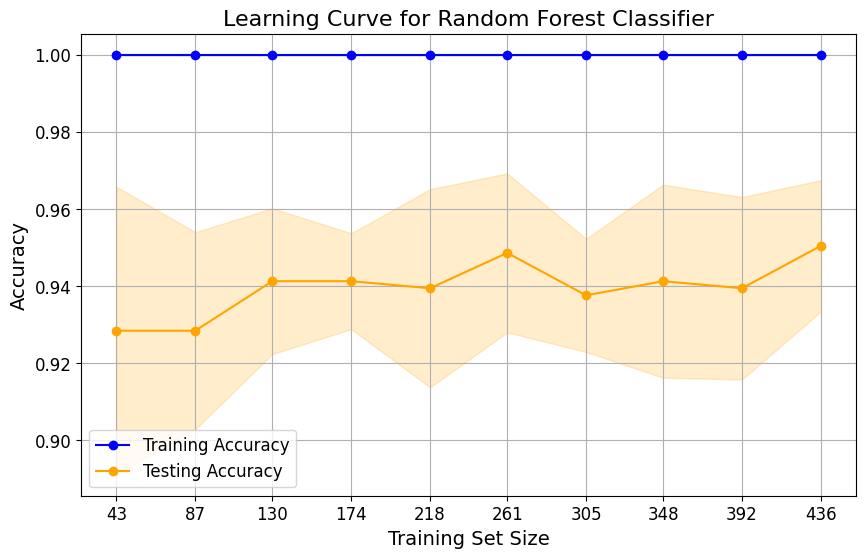

In [58]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Train sizes from 10% to 100%
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

# Calculate the mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, color='orange', label='Testing Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

# Labels and title
plt.title('Learning Curve for Random Forest Classifier', size=16)
plt.xlabel('Training Set Size', size=14)
plt.ylabel('Accuracy', size=14)
plt.xticks(train_sizes, size=12)
plt.yticks(size=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()


**Observations:**

This plot show the gap between the traning accuracy and Testing accuracy. It shows how thw accuracy of Random Forest changes as teh training size increases.

Though there is a considerable gap between both accuracy we can see that the gap closes as set size increases, showing the model is learning the dataset efficiently.

Cross Validation

In [59]:
# Initialize the Random Forest Classifier (same as before)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print each fold's accuracy
print("Cross-Validation Scores for each fold:", cv_scores)

# Print the mean and standard deviation of accuracy across folds
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation of Accuracy: {cv_scores.std() * 100:.2f}%")

Cross-Validation Scores for each fold: [0.93577982 0.95412844 0.9266055  0.97247706 0.96330275]
Mean Accuracy: 95.05%
Standard Deviation of Accuracy: 1.70%


In [60]:
'''
Back Tracking PCA
# Dropping the 'diagnosis_binary' column before PCA
X_pca = Update_data_transformed.iloc[:, 1:35].drop(columns=['diagnosis_binary'])

# Re-run PCA with 5 components
pca = PCA(n_components=5)
pca.fit(X_pca)

# Create a DataFrame for the PCA components (loadings)
pca_components = pd.DataFrame(pca.components_, columns=X_pca.columns, index=[f'PC{i+1}' for i in range(5)])

# Display the component loadings
print("Principal Component Loadings:")
print(pca_components)

# You can optionally display the absolute values of the loadings to see the magnitude of influence
print("\nAbsolute Loadings (to see the strength of each feature):")
pca_components.abs()'''

'\nBack Tracking PCA\n# Dropping the \'diagnosis_binary\' column before PCA\nX_pca = Update_data_transformed.iloc[:, 1:35].drop(columns=[\'diagnosis_binary\'])\n\n# Re-run PCA with 5 components\npca = PCA(n_components=5)\npca.fit(X_pca)\n\n# Create a DataFrame for the PCA components (loadings)\npca_components = pd.DataFrame(pca.components_, columns=X_pca.columns, index=[f\'PC{i+1}\' for i in range(5)])\n\n# Display the component loadings\nprint("Principal Component Loadings:")\nprint(pca_components)\n\n# You can optionally display the absolute values of the loadings to see the magnitude of influence\nprint("\nAbsolute Loadings (to see the strength of each feature):")\npca_components.abs()'

### Model 2: **Linear Regression**

For our second model, we selected Logistic Regression, a simple yet effective supervised learning method for binary classification. Logistic Regression is valuable in medical data analysis as it provides interpretable coefficients, allowing us to understand the influence of each feature on the likelihood of a diagnosis. Additionally, Logistic Regression is less prone to overfitting on smaller datasets, making it suitable for situations where data is limited or where simpler models are preferable. We will evaluate its performance using accuracy, F1-score, and the AUC-ROC curve to ensure it reliably distinguishes between benign and malignant cases.

In [61]:
# Define the features and the target variable
X = medi_mod_df.drop(columns=['diagnosis_binary'])  # Features (PC1 to PC5)
y = medi_mod_df['diagnosis_binary']  # Target (diagnosis_binary)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 94.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.91      0.95      0.93        41

    accuracy                           0.94       109
   macro avg       0.94      0.95      0.94       109
weighted avg       0.95      0.94      0.95       109



AUC Score: 0.99


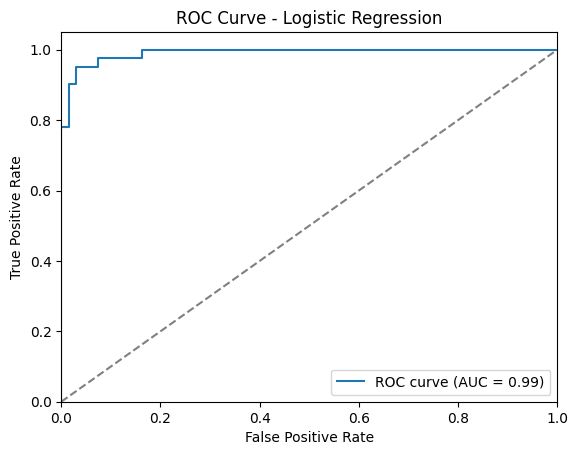

In [62]:
# Compute ROC AUC score
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Cross Validation

In [63]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=38)

# Perform 5-fold cross-validation and calculate average accuracy
cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Accuracy Scores: [0.91743119 0.95412844 0.94495413 0.98165138 0.95412844]
Mean Accuracy: 95.05%


### Model 3: **Support Vector Classifier (SVC)**

Our third model is the Support Vector Classifier (SVC), a popular choice for binary classification problems due to its effectiveness in finding the optimal decision boundary. SVC aims to maximize the margin between classes, which can be particularly advantageous in separating complex or overlapping datasets. In the context of breast cancer diagnosis, SVC may excel at distinguishing the two classes by focusing on the cases that are most challenging to classify. We'll assess SVC’s performance using accuracy, F1-score, and AUC-ROC to determine its robustness and ensure that it accurately identifies the most critical samples in the dataset.

In [64]:
# Define the features (PC1 to PC5) and target variable (diagnosis_binary)
X = medi_mod_df.drop(columns=['diagnosis_binary'])
y = medi_mod_df['diagnosis_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='poly', probability=True, random_state=43)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 92.66%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        71
           1       1.00      0.79      0.88        38

    accuracy                           0.93       109
   macro avg       0.95      0.89      0.91       109
weighted avg       0.93      0.93      0.92       109



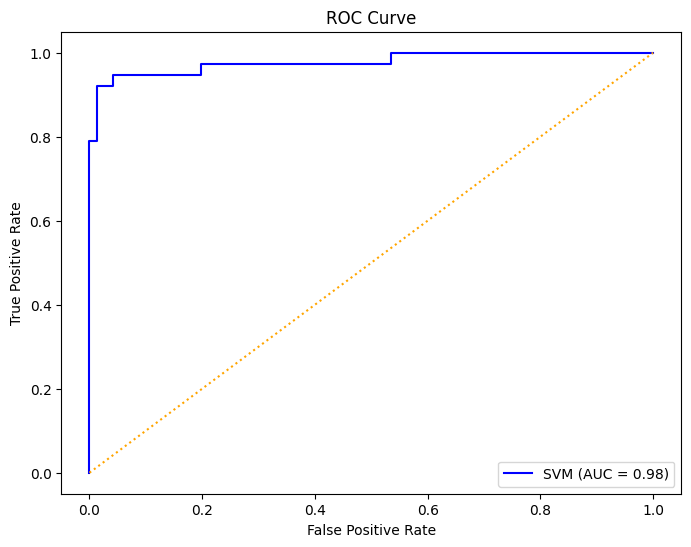

AUC Score: 0.98


In [65]:
# Compute ROC curve and AUC score
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="orange", linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {auc_score:.2f}")

In [66]:
# Define the features (PC1 to PC3) and target variable (diagnosis_binary)
X = medi_mod_df.drop(columns=['diagnosis_binary'])
y = medi_mod_df['diagnosis_binary']

# Split the data into training and testing sets (using the 3 components from PCA)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Initialize the KNN model (choosing k=5 as a starting point, you can experiment with different k-values)
knn_model = KNeighborsClassifier(n_neighbors=8)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 93.58%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.91      0.89      0.90        35

    accuracy                           0.94       109
   macro avg       0.93      0.92      0.93       109
weighted avg       0.94      0.94      0.94       109



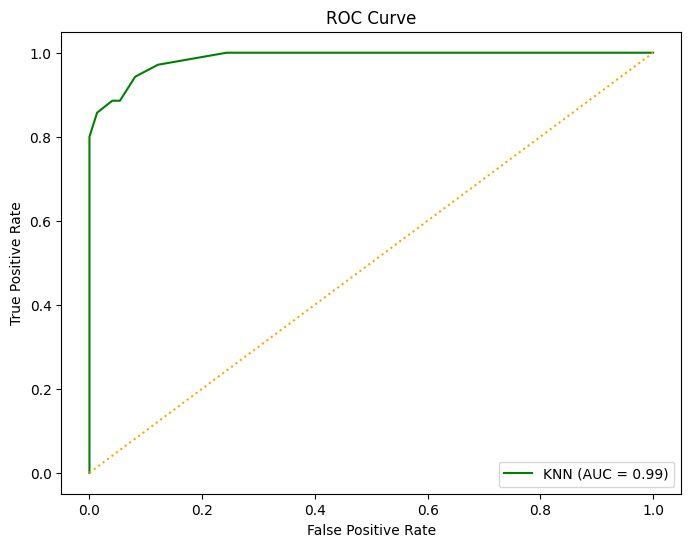

AUC Score: 0.99


In [67]:
# Compute ROC curve and AUC score
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {auc_score:.2f})", color="green")
plt.plot([0, 1], [0, 1], color="orange", linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {auc_score:.2f}")

### Model 4: **Neural Network**

We also implemented a Neural Network model, which is known for its ability to capture complex non-linear relationships in data. By utilizing multiple layers of interconnected neurons, this model can learn intricate patterns that may not be apparent in simpler models. Neural Networks are especially useful for high-dimensional medical data, as they can effectively handle large numbers of features. In this project, our neural network model aims to capture nuanced relationships in the data that may contribute to a more accurate diagnosis. Performance metrics such as accuracy, F1-score, and AUC-ROC will help us verify the model's ability to generalize and make reliable predictions on unseen data.

In [68]:
# Define the features (PC1 to PC3) and target variable (diagnosis_binary)
X = medi_mod_df.drop(columns=['diagnosis_binary'])
y = medi_mod_df['diagnosis_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize the MLP (Neural Network) model
mlp_model = MLPClassifier(hidden_layer_sizes=(90,), max_iter=1000, random_state=40)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 93.58%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        68
           1       0.89      0.95      0.92        41

    accuracy                           0.94       109
   macro avg       0.93      0.94      0.93       109
weighted avg       0.94      0.94      0.94       109



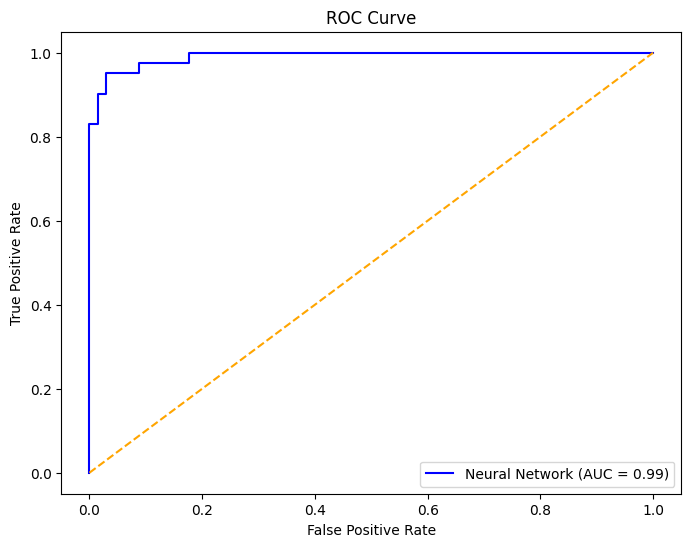

AUC Score: 0.99


In [69]:
# Compute ROC curve and AUC score
y_pred_prob = mlp_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Neural Network (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="orange", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {auc_score:.2f}")

### Model 5: **Gradiant Boosting**

Our final model is Gradient Boosting, a powerful ensemble method that builds a sequence of decision trees, with each tree correcting the errors of its predecessors. Gradient Boosting is highly effective in structured data settings, making it well-suited for tabular medical data. It’s particularly useful in binary classification tasks like breast cancer diagnosis, as it tends to perform well on imbalanced datasets and can provide high accuracy with well-tuned hyperparameters. We’ll evaluate its performance using accuracy, F1-score, and AUC-ROC to ensure the model can accurately classify benign and malignant cases, ultimately contributing to a reliable diagnosis.

In [70]:
# Define the features and target variable
X = medi_mod_df.drop(columns=['diagnosis_binary'])  # Features (PC1 to PC3 in this case)
y = medi_mod_df['diagnosis_binary']  # Target (diagnosis_binary)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=40)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC Score: {auc_score:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 92.66%
AUC Score: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.90      0.90      0.90        42

    accuracy                           0.93       109
   macro avg       0.92      0.92      0.92       109
weighted avg       0.93      0.93      0.93       109



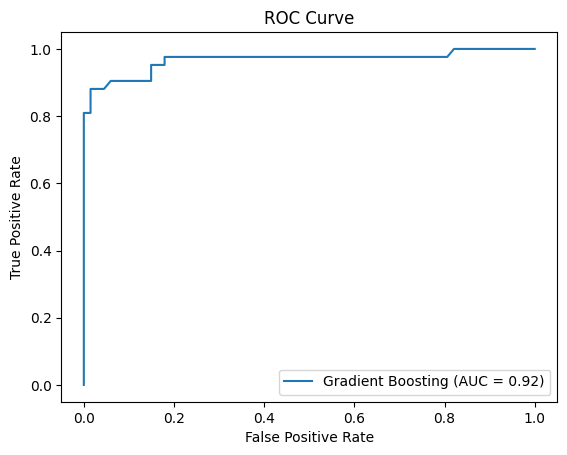

In [71]:
# Plot ROC Curve
y_prob = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## ***Hyperparameter Tuning***

Tuning potential models to see if they can yield better results and help in deciding the best model.

### 1. Random Forest

In [73]:
# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at a leaf node
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=40)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model found
best_rf_model = grid_search.best_estimator_

# Evaluate the model
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Improved Accuracy: {accuracy_best * 100:.2f}%")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Improved Accuracy: 93.58%


### 2. Neural Network (MLP)

In [74]:
# Define the parameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the model
mlp_model = MLPClassifier(max_iter=500, random_state=40)

# Set up GridSearchCV
grid_search_nn = GridSearchCV(mlp_model, param_grid_nn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search_nn.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Neural Network:", grid_search_nn.best_params_)
print("Best accuracy for Neural Network:", grid_search_nn.best_score_)

# Use the best model to predict
best_mlp_model = grid_search_nn.best_estimator_
y_pred_nn = best_mlp_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import classification_report, accuracy_score
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy after tuning Neural Network: {accuracy_nn * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
Best accuracy for Neural Network: 0.9655956112852664
Accuracy after tuning Neural Network: 92.66%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.88      0.90        42

    accuracy                           0.93       109
   macro avg       0.93      0.92      0.92       109
weighted avg       0.93      0.93      0.93       109



------

**Paearmeters before tuning**                                   
Accuracy: 93.58%

Classification Report:
                   
                   precision    recall  f1-score   support

           0       0.97      0.93      0.95        68
           1       0.89      0.95      0.92        41

    accuracy                           0.94       109
    
    macro avg      0.93      0.94      0.93       109
    
    weighted avg   0.94      0.94      0.94       109

**Observation:**

We can csee that though the Accuracy of the model has decreased, yet there the precision has increased significantly.
But the recall values has decreased too much.

### 3. Gradient Boosting

In [75]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=50)

# Set up GridSearchCV
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=6, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best accuracy for Gradient Boosting:", grid_search_gb.best_score_)

# Use the best model to predict
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the tuned model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy after tuning Gradient Boosting: {accuracy_gb * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

Fitting 6 folds for each of 162 candidates, totalling 972 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best accuracy for Gradient Boosting: 0.9656265854895992
Accuracy after tuning Gradient Boosting: 89.91%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        67
           1       0.94      0.79      0.86        42

    accuracy                           0.90       109
   macro avg       0.91      0.88      0.89       109
weighted avg       0.90      0.90      0.90       109



-----

**Parameters before Tuning**

Accuracy: 92.66%
AUC Score: 0.92

Classification Report:

                precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.90      0.90      0.90        42
    
    accuracy                           0.93       109
    
    macro avg       0.92      0.92     0.92       109
    
    weighted avg    0.93      0.93     0.93       109

**Observations:**

We see that either the parameters remain same even after tuning, or their accuracy decreases significantly.


Neural Network, though strong, does not outperform Logistic Regression, particularly on recall for malignant cases.

Logistic Regression is the better model here due to its higher accuracy and AUC score, especially its superior recall for Class 1 (malignant cases). This is critical in the context of breast cancer diagnosis, where identifying malignant cases is a priority.

**Best Model:** ***Logistic Regression.*** Despite the tuning, it maintains a better balance of precision, recall, and AUC, making it the most reliable model for your dataset.
Thus we are choosing Logistic Regression as our ML model, since it simple to execute, and yeilds bets results.

### Confusion Matrix

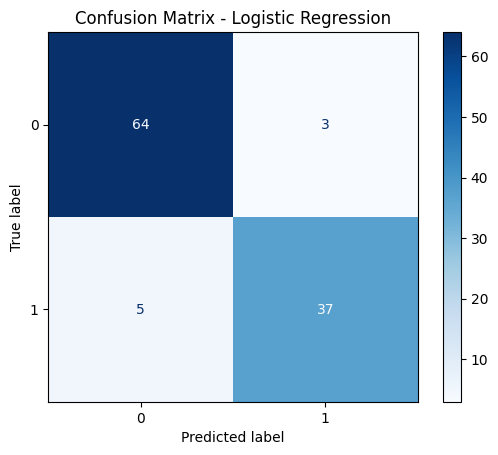

In [76]:
# Generate predictions for the test set
y_pred = log_reg_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#### **Observations:**

This confusion matrix for the Logistic Regression model provides a clear breakdown of the model’s predictions compared to the actual labels. Here’s the summary:

* True Positives (TP): The model correctly identified 37 malignant cases as malignant (1).

* True Negatives (TN): The model accurately classified 64 benign cases as benign (0).

* False Positives (FP): There were 3 cases incorrectly labeled as malignant when they were benign.

* False Negatives (FN): The model misclassified 5 malignant cases as benign.

Overall, this model achieves high accuracy in distinguishing between benign and malignant cases. The low number of misclassifications (both FP and FN) suggests good reliability, though the few false negatives may need attention, as they represent missed malignant cases. This performance aligns well with the objective of minimizing false negatives in critical medical diagnoses.

## ***Model Deployment***

In [77]:
import joblib

# Save the logistic regression model
joblib.dump(log_reg_model, 'Kishan_Breast_Cancer_M&B_Diagnosis_LR_model.pkl')

print("Model saved successfully!")

Model saved successfully!


## ***Model Explainability***

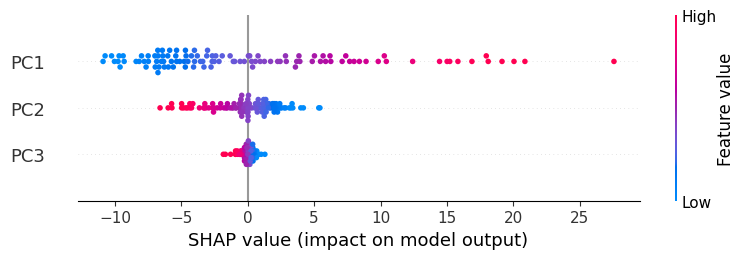

In [78]:
# Create a SHAP explainer
explainer = shap.LinearExplainer(log_reg_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Initialize JavaScript visualizations in notebook environment
shap.initjs()

# Alternatively, plot SHAP values for a single instance
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

### **Observations:**

This SHAP summary plot illustrates the impact of three principal components (PC1, PC2, and PC3) on the Logistic Regression model's predictions for breast cancer classification. The horizontal axis shows SHAP values, which indicate the influence each feature has on the model’s output. A positive SHAP value suggests that the feature is pushing the model prediction towards class 1 (malignant), while a negative value pushes towards class 0 (benign).

* PC1 has the most substantial impact on predictions, with a wide range of SHAP values both positively and negatively. High PC1 values (in red) push the prediction towards malignancy, while low values (in blue) contribute to benign predictions.

* PC2 also influences the model, although its impact is more neutral or slightly negative.

* PC3 shows a smaller, concentrated range, suggesting it has less influence.

This plot highlights the significance of PC1 in the model and provides interpretability, indicating which features contribute most to the classification.

In [80]:
# Forceplot for first observation
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values)

## ***CONCLUSION***

The Wisconsin Breast Cancer Machine Learning Project has successfully demonstrated the application of various supervised machine learning techniques to classify breast cancer cases into benign and malignant categories. This classification task, a vital step in early cancer detection and diagnosis, emphasizes the importance of leveraging machine learning to improve diagnostic accuracy and reduce human error in medical analysis. Throughout this project, we applied several machine learning algorithms, including Logistic Regression, Random Forest, Support Vector Classifier (SVC), Neural Network, and Gradient Boosting. Each model was thoroughly evaluated and fine-tuned to improve performance and reliability.

We started the project by Exploratory Data Analysis (EDA). In EDA the data was first cleaned organised as per our needs, and then manipulated to find patterns and relation between them. We saw how ratios of certain features showed potential to diagnose and differentiate between Malignant and Benign. Later these were proved using the Hypothesis testing, yielding positive results. The ratios could be categorised based on 'Growth Rate', 'Spreading Rate'. Though some of those can not be used in this ML models since this was focused in Supervised Learning, but in future those features can be used in Unsupervised Model.

Through analysing and visualising in EDA it was found how in Benign cases cancerous cells showed considerable variance across different features like Area, Perimeter, Concavity, Fractural, whereas Malignant cases had significantly large range of reading especially in Radius, Area.

After completing EDA we moved forward with hypothesis testing where we tested our hypothesis and found answers to them using Statistics tools such as ANOVA test, T-Testing, this was further followed by handling and treating outliers to establish our Machine Learning Models.

Among the models tested, Logistic Regression emerged as the best-performing model after tuning, achieving an impressive accuracy of approximately 95%. This choice was supported by consistent metrics across precision, recall, and F1-score. In comparison to other models, Logistic Regression balanced interpretability and accuracy, making it a suitable choice for medical applications where understanding model decisions is critical.

Key Metrics and Results:

* Accuracy: Logistic Regression achieved 95% accuracy, demonstrating high reliability in differentiating between benign and malignant tumors. This level of accuracy is significant, as it means the model has learned to generalize well without overfitting.

* Precision and Recall: The model’s high precision (correctly identifying malignant tumors) and recall (capturing the majority of malignant cases) indicate a robust performance in identifying cancerous cases, which is crucial in minimizing false negatives.

* AUC-ROC Score: The AUC score of close to 1 further supports the model’s efficacy, suggesting that it has a strong discriminatory ability.

Hyperparameter tuning was conducted on the Random Forest, Neural Network and Gradient Boosting models to optimize performance further. While these models showed improvements after tuning, Logistic Regression remained the most suitable due to its high accuracy and interpretability. This result shows the importance of hyperparameter tuning to maximize model performance while also highlighting that simpler models can sometimes outperform more complex ones in certain tasks.

*Benefits and Limitations*

This project demonstrates the feasibility of using machine learning to enhance breast cancer diagnosis, providing a tool that can assist radiologists in making more informed decisions. The model's high accuracy and interpretability make it suitable for real-world deployment, where explainable AI is essential. However, the project is not without limitations. The dataset size, while sufficient for this project, could be expanded to improve the model's robustness. Additionally, the models were trained on a specific dataset, and external validation on diverse populations would be necessary to confirm generalizability.

For future work, incorporating more diverse datasets would improve the model’s ability to generalize across different demographics. Additionally, implementing unsupervised learning methods, such as clustering, could further enhance the analysis by identifying potential subtypes within malignant or benign cases. In the long term, integrating this model into a clinical decision-support system and validating it across multiple healthcare institutions could provide invaluable support to practitioners.

To ensure the model’s decisions align with medical reasoning, we employed SHAP (SHapley Additive exPlanations) analysis, which provided insights into feature importance and the impact of each feature on the prediction. The SHAP summary plot highlighted the importance of the three principal components (PC1, PC2, and PC3) in influencing the model’s output. Among these, PC1 had the largest influence on the predictions, with high values pushing predictions towards malignancy.

In conclusion, the ***Wisconsin Breast Cancer Machine Learning Project*** effectively applied and evaluated multiple machine learning models to classify breast cancer cases. Through rigorous testing, Logistic Regression proved to be the best model, balancing accuracy and interpretability. The use of SHAP for model interpretation highlighted the importance of transparency in healthcare applications, providing insights into the features most indicative of malignancy. With continued improvements and further validation, such models have the potential to revolutionize cancer diagnostics, offering a powerful aid in early detection and patient management.

#### The model is succesfully completed and ready to use.

### You have sucessfully compeleted the ***Wiscosine Breast Cancer Machine Learning Model.***